In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

C:\Users\Dell\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Dell\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\Dell\anaconda3\lib\site-packages\numpy\.libs\libopenblas.xwydx2ikjw2nmtwsfyngfuwkqu3lytcz.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv("./df_reduced_feature.csv")
df2 = pd.read_csv("./df_reduced_feature_encoded.csv")

In [3]:
df.head()

,Unnamed: 0,state,sttl,Sload,Dload,swin,dwin,stcpb,dtcpb,dmeansz,...,ct_state_ttl,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,0,CON,31,5.047801e+05,6.271510e+05,0,0,0,0,82,...,0,,2,3,9,1,1,1,Normal,0
1,1,INT,60,1.508571e+08,0.000000e+00,0,0,0,0,0,...,0,,57,57,56,56,20,57,Normal,0
2,2,FIN,31,1.930670e+06,1.467602e+07,255,255,3749459648,1621172393,463,...,0,,3,2,6,1,1,1,Normal,0
3,3,FIN,254,4.031583e+03,2.730115e+03,255,255,1595364685,3437994824,59,...,1,,5,2,2,2,1,2,Normal,0
4,4,FIN,31,1.846902e+06,4.032078e+06,255,255,1560901437,3710780746,189,...,0,,7,7,3,2,1,3,Normal,0


In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df2.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df.head()

,state,sttl,Sload,Dload,swin,dwin,stcpb,dtcpb,dmeansz,Stime,...,ct_state_ttl,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,CON,31,5.047801e+05,6.271510e+05,0,0,0,0,82,1424228654,...,0,,2,3,9,1,1,1,Normal,0
1,INT,60,1.508571e+08,0.000000e+00,0,0,0,0,0,1424230503,...,0,,57,57,56,56,20,57,Normal,0
2,FIN,31,1.930670e+06,1.467602e+07,255,255,3749459648,1621172393,463,1424219965,...,0,,3,2,6,1,1,1,Normal,0
3,FIN,254,4.031583e+03,2.730115e+03,255,255,1595364685,3437994824,59,1424227838,...,1,,5,2,2,2,1,2,Normal,0
4,FIN,31,1.846902e+06,4.032078e+06,255,255,1560901437,3710780746,189,1424224020,...,0,,7,7,3,2,1,3,Normal,0


In [6]:
df2.head()

,state,sttl,Sload,Dload,swin,dwin,stcpb,dtcpb,dmeansz,Stime,...,ct_state_ttl,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,2.0,31,5.047801e+05,6.271510e+05,0,0,0,0,82,1424228654,...,0,0.0,2,3,9,1,1,1,8.0,0
1,5.0,60,1.508571e+08,0.000000e+00,0,0,0,0,0,1424230503,...,0,0.0,57,57,56,56,20,57,8.0,0
2,4.0,31,1.930670e+06,1.467602e+07,255,255,3749459648,1621172393,463,1424219965,...,0,0.0,3,2,6,1,1,1,8.0,0
3,4.0,254,4.031583e+03,2.730115e+03,255,255,1595364685,3437994824,59,1424227838,...,1,0.0,5,2,2,2,1,2,8.0,0
4,4.0,31,1.846902e+06,4.032078e+06,255,255,1560901437,3710780746,189,1424224020,...,0,0.0,7,7,3,2,1,3,8.0,0


In [7]:
def getXy():
    X = df2.drop(['Label'], axis=1)
    y = df2["Label"]
    
    return (X,y)

In [8]:
from sklearn.model_selection import train_test_split

def getSplittedXy(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
    return (X_train,X_test ,y_train, y_test, )

In [9]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True, target_names=['No Intrusion', 'Intrusion']))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"\nACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"\nCLASSIFICATION REPORT:\n{clf_report}")
    
    
    print("_________________________________________________________________________________")

    print("\nTESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True, target_names=['No Intrusion', 'Intrusion']))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"\nACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"\nCLASSIFICATION REPORT:\n{clf_report}")

In [10]:
cols = df.columns
cols=cols.drop(['Label'])

In [11]:
cols

Index(['state', 'sttl', 'Sload', 'Dload', 'swin', 'dwin', 'stcpb', 'dtcpb',
       'dmeansz', 'Stime', 'Ltime', 'ct_state_ttl', 'ct_ftp_cmd', 'ct_srv_src',
       'ct_srv_dst', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'attack_cat'],
      dtype='object')

### Feature Scaling

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
# from sklearn.metrics import accuracy_score

X,y = getXy()

sc = RobustScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = getSplittedXy(X,y)

In [13]:
df.shape

(92749, 21)

In [15]:
dict_training_accuracy = {}
dict_testing_accuracy = {}
dict_training_time = {}
dict_testing_time = {}

SyntaxError: invalid syntax (<ipython-input-24-75581a19d5e7>, line 3)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=None, n_neighbors=5, p=2, weights='uniform')

In [16]:
start_time = time.time()
KNN.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["KNN"] = end_time-start_time

Training time:  0.0064809322357177734


In [17]:
start_time = time.time()
y_test_KNN= KNN.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["KNN"] = end_time-start_time

Testing time:  3.4038326740264893


In [18]:
dict_training_accuracy["KNN"] = KNN.score(X_train, y_train)
dict_testing_accuracy["KNN"] = KNN.score(X_test,y_test)


print("Train score is:", KNN.score(X_train, y_train))
print("Test score is:",KNN.score(X_test,y_test))

Train score is: 0.999599531760212
Test score is: 0.9993171608265948


In [19]:
evaluate(KNN, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[28021    18]
 [    8 36877]]

ACCURACY SCORE:
0.9996

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999715      0.999512    0.9996      0.999613        0.9996
recall         0.999358      0.999783    0.9996      0.999571        0.9996
f1-score       0.999536      0.999648    0.9996      0.999592        0.9996
support    28039.000000  36885.000000    0.9996  64924.000000    64924.0000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11948    13]
 [    6 15858]]

ACCURACY SCORE:
0.9993

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999498      0.999181  0.999317      0.999339      0.999317
recall         0.998913      0.999622  0.999317      0.999267      0.999317
f1-score       0.999206      0.999401  0.999317      0.999303      0.999317
sup

In [20]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
k_range = list(range(1, 25))
#create a dictionary of all values we want to test for n_neighbors
param_grid = dict(n_neighbors=k_range)
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

In [21]:
start_time = time.time()
knn_gscv.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)
dict_training_time["knn_gscv"] = end_time-start_time

Training time:  169.29341459274292


In [22]:
start_time = time.time()
y_test_knn_gscv= knn_gscv.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)
dict_testing_time["knn_gscv"] = end_time-start_time

Testing time:  3.5722968578338623


In [23]:
dict_training_accuracy["knn_gscv"] = knn_gscv.score(X_train, y_train)
dict_testing_accuracy["knn_gscv"] = knn_gscv.score(X_test,y_test)


print("Train score is:", knn_gscv.score(X_train, y_train))
print("Test score is:",knn_gscv.score(X_test,y_test))

Train score is: 1.0
Test score is: 0.9996046720575023


In [24]:
evaluate(knn_gscv, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[28039     0]
 [    0 36885]]

ACCURACY SCORE:
1.0000

CLASSIFICATION REPORT:
           No Intrusion  Intrusion  accuracy  macro avg  weighted avg
precision           1.0        1.0       1.0        1.0           1.0
recall              1.0        1.0       1.0        1.0           1.0
f1-score            1.0        1.0       1.0        1.0           1.0
support         28039.0    36885.0       1.0    64924.0       64924.0
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11956     5]
 [    6 15858]]

ACCURACY SCORE:
0.9996

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999498      0.999685  0.999605      0.999592      0.999605
recall         0.999582      0.999622  0.999605      0.999602      0.999605
f1-score       0.999540      0.999653  0.999605      0.999597      0.999605
support    11961.000000  15864.00

### Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
nb_gaussian = GaussianNB()

In [26]:
start_time = time.time()
nb_gaussian.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["nb_gaussian"] = end_time-start_time

Training time:  0.016992807388305664


In [27]:
start_time = time.time()
y_test_nb_gaussian = nb_gaussian.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["nb_gaussian"] = end_time-start_time

Testing time:  0.017042160034179688


In [28]:
dict_training_accuracy["nb_gaussian"] = nb_gaussian.score(X_train, y_train)
dict_testing_accuracy["nb_gaussian"] = nb_gaussian.score(X_test,y_test)


print("Train score is:", nb_gaussian.score(X_train, y_train))
print("Test score is:",nb_gaussian.score(X_test,y_test))

Train score is: 0.9755252294991067
Test score is: 0.9759928122192273


In [29]:
evaluate(nb_gaussian, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[26450  1589]
 [    0 36885]]

ACCURACY SCORE:
0.9755

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      1.000000      0.958699  0.975525      0.979350      0.976536
recall         0.943329      1.000000  0.975525      0.971664      0.975525
f1-score       0.970838      0.978914  0.975525      0.974876      0.975426
support    28039.000000  36885.000000  0.975525  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11293   668]
 [    0 15864]]

ACCURACY SCORE:
0.9760

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      1.000000      0.959594  0.975993      0.979797      0.976963
recall         0.944152      1.000000  0.975993      0.972076      0.975993
f1-score       0.971274      0.979380  0.975993      0.975327      0.975896
sup

### Decision Tree

#### Decison tree entropy, auto 

In [30]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
d_tree_sqrt_entropy = DecisionTreeClassifier(criterion="entropy", max_depth = 4, max_features='sqrt')

In [31]:
start_time = time.time()
d_tree_sqrt_entropy.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  0.049777984619140625


In [32]:
start_time = time.time()
y_test_d_tree_sqrt_entropy = d_tree_sqrt_entropy.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)
dict_testing_time["d_tree_sqrt_entropy"] = end_time-start_time

Testing time:  0.0


In [33]:
dict_training_accuracy["d_tree_sqrt_entropy"] = d_tree_sqrt_entropy.score(X_train, y_train)
dict_testing_accuracy["d_tree_sqrt_entropy"] = d_tree_sqrt_entropy.score(X_test,y_test)

print("Train score is:", d_tree_sqrt_entropy.score(X_train, y_train))
print("Test score is:",d_tree_sqrt_entropy.score(X_test,y_test))

Train score is: 0.994516665639825
Test score is: 0.9953998203054807


In [34]:
evaluate(d_tree_sqrt_entropy, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[27687   352]
 [    4 36881]]

ACCURACY SCORE:
0.9945

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999856      0.990546  0.994517      0.995201      0.994567
recall         0.987446      0.999892  0.994517      0.993669      0.994517
f1-score       0.993612      0.995197  0.994517      0.994404      0.994512
support    28039.000000  36885.000000  0.994517  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11835   126]
 [    2 15862]]

ACCURACY SCORE:
0.9954

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999831      0.992119    0.9954      0.995975      0.995434
recall         0.989466      0.999874    0.9954      0.994670      0.995400
f1-score       0.994621      0.995981    0.9954      0.995301      0.995397
sup

#### Decison tree gini, sqrt 

In [35]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
d_tree_sqrt_gini = DecisionTreeClassifier(criterion="gini", max_depth = 2, max_features='sqrt')

In [36]:
start_time = time.time()
d_tree_sqrt_gini.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["d_tree_sqrt_gini"] = end_time-start_time

Training time:  0.016722440719604492


In [37]:
start_time = time.time()
y_test_d_tree_sqrt_gini = d_tree_sqrt_gini.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["d_tree_sqrt_gini"] = end_time-start_time

Testing time:  0.007635593414306641


In [38]:
dict_training_accuracy["d_tree_sqrt_gini"] = d_tree_sqrt_gini.score(X_train, y_train)
dict_testing_accuracy["d_tree_sqrt_gini"] = d_tree_sqrt_gini.score(X_test,y_test)

print("Train score is:", d_tree_sqrt_gini.score(X_train, y_train))
print("Test score is:",d_tree_sqrt_gini.score(X_test,y_test))

Train score is: 0.999599531760212
Test score is: 0.9994968553459119


In [39]:
evaluate(d_tree_sqrt_gini, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[28039     0]
 [   26 36859]]

ACCURACY SCORE:
0.9996

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999074      1.000000    0.9996      0.999537        0.9996
recall         1.000000      0.999295    0.9996      0.999648        0.9996
f1-score       0.999537      0.999647    0.9996      0.999592        0.9996
support    28039.000000  36885.000000    0.9996  64924.000000    64924.0000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11961     0]
 [   14 15850]]

ACCURACY SCORE:
0.9995

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.998831      1.000000  0.999497      0.999415      0.999497
recall         1.000000      0.999117  0.999497      0.999559      0.999497
f1-score       0.999415      0.999559  0.999497      0.999487      0.999497
sup

#### Decison tree entropy, log2

In [40]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
d_tree_log2_entropy = DecisionTreeClassifier(criterion="entropy", max_depth = 1, max_features='log2')

In [41]:
start_time = time.time()
d_tree_log2_entropy.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["d_tree_log2_entropy"] = end_time-start_time

Training time:  0.020127296447753906


In [42]:
start_time = time.time()
Y_test_pred2 = d_tree_log2_entropy.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["d_tree_log2_entropy"] = end_time-start_time

Testing time:  0.003942728042602539


In [43]:
dict_training_accuracy["d_tree_log2_entropy"] = d_tree_log2_entropy.score(X_train, y_train)
dict_testing_accuracy["d_tree_log2_entropy"] = d_tree_log2_entropy.score(X_test,y_test)

print("Train score is:", d_tree_log2_entropy.score(X_train, y_train))
print("Test score is:",d_tree_log2_entropy.score(X_test,y_test))

Train score is: 0.8978189883556158
Test score is: 0.8944115004492363


In [44]:
evaluate(d_tree_log2_entropy, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[26301  1738]
 [ 4896 31989]]

ACCURACY SCORE:
0.8978

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.843062      0.948469  0.897819      0.895765      0.902946
recall         0.938015      0.867263  0.897819      0.902639      0.897819
f1-score       0.888007      0.906050  0.897819      0.897029      0.898258
support    28039.000000  36885.000000  0.897819  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11221   740]
 [ 2198 13666]]

ACCURACY SCORE:
0.8944

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.836202      0.948633  0.894412      0.892417      0.900303
recall         0.938132      0.861447  0.894412      0.899790      0.894412
f1-score       0.884240      0.902940  0.894412      0.893590      0.894901
sup

#### Decison tree gini, log2

In [45]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
d_tree_log2_gini = DecisionTreeClassifier(criterion="gini", max_depth = 1, max_features='log2')

In [46]:
start_time = time.time()
d_tree_log2_gini.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["d_tree_log2_gini"] = end_time-start_time

Training time:  0.01637101173400879


In [47]:
start_time = time.time()
y_test_d_tree_log2_gini = d_tree_log2_gini.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["d_tree_log2_gini"] = end_time-start_time

Testing time:  0.0


In [48]:
dict_training_accuracy["d_tree_log2_gini"] = d_tree_log2_gini.score(X_train, y_train)
dict_testing_accuracy["d_tree_log2_gini"] = d_tree_log2_gini.score(X_test,y_test)

print("Train score is:", d_tree_log2_gini.score(X_train, y_train))
print("Test score is:",d_tree_log2_gini.score(X_test,y_test))

Train score is: 0.7033454500646911
Test score is: 0.7002336028751123


In [49]:
evaluate(d_tree_log2_gini, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[24946  3093]
 [16167 20718]]

ACCURACY SCORE:
0.7033

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.606767      0.870102  0.703345      0.738434      0.756374
recall         0.889689      0.561692  0.703345      0.725691      0.703345
f1-score       0.721483      0.682681  0.703345      0.702082      0.699439
support    28039.000000  36885.000000  0.703345  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[10615  1346]
 [ 6995  8869]]

ACCURACY SCORE:
0.7002

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.602783      0.868233  0.700234      0.735508      0.754125
recall         0.887468      0.559065  0.700234      0.723266      0.700234
f1-score       0.717933      0.680164  0.700234      0.699049      0.696400
sup

### Support Vector Machine

#### SVM rbf 

In [50]:
from sklearn.svm import SVC
svm_rbf = SVC(kernel='rbf',gamma = 'scale',)

In [51]:
start_time = time.time()
svm_rbf.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["svm_rbf"] = end_time-start_time

Training time:  4.147833824157715


In [52]:
start_time = time.time()
y_test_svm_rbf = svm_rbf.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["svm_poly"] = end_time-start_time

Testing time:  2.582406997680664


In [53]:
dict_training_accuracy["svm_rbf"] = svm_rbf.score(X_train, y_train)
dict_testing_accuracy["svm_rbf"] = svm_rbf.score(X_test,y_test)

print("Train score is:", svm_rbf.score(X_train, y_train))
print("Test score is:", svm_rbf.score(X_test,y_test))

Train score is: 0.999537921261783
Test score is: 0.999424977538185


In [54]:
evaluate(svm_rbf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[28034     5]
 [   25 36860]]

ACCURACY SCORE:
0.9995

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999109      0.999864  0.999538      0.999487      0.999538
recall         0.999822      0.999322  0.999538      0.999572      0.999538
f1-score       0.999465      0.999593  0.999538      0.999529      0.999538
support    28039.000000  36885.000000  0.999538  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11958     3]
 [   13 15851]]

ACCURACY SCORE:
0.9994

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.998914      0.999811  0.999425      0.999362      0.999425
recall         0.999749      0.999181  0.999425      0.999465      0.999425
f1-score       0.999331      0.999496  0.999425      0.999413      0.999425
sup

#### SVM poly

In [55]:
svm_poly = SVC(kernel='poly', gamma='scale', degree=5)

In [56]:
start_time = time.time()
svm_poly.fit(X_train, y_train.values.ravel())
end_time = time.time()

print("Training time: ",end_time-start_time)

dict_training_time["svm_poly"] = end_time-start_time

Training time:  95.52721858024597


In [57]:
start_time = time.time()
y_test_svm_poly = svm_poly.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["svm_poly"] = end_time-start_time

Testing time:  19.55463409423828


In [58]:
dict_training_accuracy["svm_poly"] = svm_rbf.score(X_train, y_train)
dict_testing_accuracy["svm_poly"] = svm_rbf.score(X_test,y_test)

print("Train score is:", svm_poly.score(X_train, y_train))
print("Test score is:", svm_poly.score(X_test,y_test))

Train score is: 0.8704947323023843
Test score is: 0.8689667565139263


In [59]:
evaluate(svm_poly, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[19632  8407]
 [    1 36884]]

ACCURACY SCORE:
0.8705

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999949      0.814378  0.870495      0.907164      0.894521
recall         0.700168      0.999973  0.870495      0.850070      0.870495
f1-score       0.823628      0.897683  0.870495      0.860656      0.865701
support    28039.000000  36885.000000  0.870495  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[ 8318  3643]
 [    3 15861]]

ACCURACY SCORE:
0.8690

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999639      0.813218  0.868967      0.906429      0.893354
recall         0.695427      0.999811  0.868967      0.847619      0.868967
f1-score       0.820235      0.896912  0.868967      0.858574      0.863951
sup

#### svm linear

In [60]:
svm_linear = SVC(kernel='linear', gamma='scale')

In [61]:

start_time = time.time()
svm_linear.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["svm_linear"] = end_time-start_time


Training time:  2.0496294498443604


In [62]:
start_time = time.time()
y_test_svm_linear = svm_linear.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["svm_linear"] = end_time-start_time


Testing time:  0.1498088836669922


In [63]:
dict_training_accuracy["svm_linear"] = svm_linear.score(X_train, y_train)
dict_testing_accuracy["svm_linear"] = svm_linear.score(X_test,y_test)

print("Train score is:", svm_linear.score(X_train, y_train))
print("Test score is:", svm_linear.score(X_test,y_test))

Train score is: 0.999599531760212
Test score is: 0.9994968553459119


In [64]:
evaluate(svm_linear, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[28039     0]
 [   26 36859]]

ACCURACY SCORE:
0.9996

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999074      1.000000    0.9996      0.999537        0.9996
recall         1.000000      0.999295    0.9996      0.999648        0.9996
f1-score       0.999537      0.999647    0.9996      0.999592        0.9996
support    28039.000000  36885.000000    0.9996  64924.000000    64924.0000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11961     0]
 [   14 15850]]

ACCURACY SCORE:
0.9995

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.998831      1.000000  0.999497      0.999415      0.999497
recall         1.000000      0.999117  0.999497      0.999559      0.999497
f1-score       0.999415      0.999559  0.999497      0.999487      0.999497
sup

#### svm sigmoid

In [65]:
svm_sigmoid = SVC(kernel='sigmoid', gamma='scale')

In [66]:
start_time = time.time()
svm_sigmoid.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["svm_sigmoid"] = end_time-start_time


Training time:  28.0928475856781


In [67]:
start_time = time.time()
y_test_svm_sigmoid = svm_sigmoid.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["svm_sigmoid"] = end_time-start_time


Testing time:  6.265135765075684


In [68]:
dict_training_accuracy["svm_sigmoid"] = svm_sigmoid.score(X_train, y_train)
dict_testing_accuracy["svm_sigmoid"] = svm_sigmoid.score(X_test,y_test)

print("Train score is:", svm_sigmoid.score(X_train, y_train))
print("Test score is:", svm_sigmoid.score(X_test,y_test))

Train score is: 0.9218470827428994
Test score is: 0.9179874213836478


In [69]:
evaluate(svm_sigmoid, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[25516  2523]
 [ 2551 34334]]

ACCURACY SCORE:
0.9218

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.909110      0.931546  0.921847      0.920328      0.921857
recall         0.910018      0.930839  0.921847      0.920429      0.921847
f1-score       0.909564      0.931193  0.921847      0.920378      0.921852
support    28039.000000  36885.000000  0.921847  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[10865  1096]
 [ 1186 14678]]

ACCURACY SCORE:
0.9180

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.901585      0.930519  0.917987      0.916052      0.918081
recall         0.908369      0.925240  0.917987      0.916804      0.917987
f1-score       0.904964      0.927872  0.917987      0.916418      0.918024
sup

### Logistic Regression

#### logistic reg , l1

In [70]:
from sklearn.linear_model import LogisticRegression
log_reg_l1 = LogisticRegression(max_iter=100000, solver='liblinear', penalty='l1' )

In [71]:
start_time = time.time()
log_reg_l1.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["log_reg_l1"] = end_time-start_time

Training time:  0.23337411880493164


In [72]:
start_time = time.time()
y_test_log_reg_l1 = log_reg_l1.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["log_reg_l1"] = end_time-start_time

Testing time:  0.0


In [73]:
dict_training_accuracy["log_reg_l1"] =  log_reg_l1.score(X_train, y_train)
dict_testing_accuracy["log_reg_l1"] =  log_reg_l1.score(X_test, y_test)

print("Train score is:", log_reg_l1.score(X_train, y_train))
print("Test score is:",log_reg_l1.score(X_test,y_test))

Train score is: 0.999599531760212
Test score is: 0.9994609164420485


In [74]:
evaluate(log_reg_l1, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[28039     0]
 [   26 36859]]

ACCURACY SCORE:
0.9996

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999074      1.000000    0.9996      0.999537        0.9996
recall         1.000000      0.999295    0.9996      0.999648        0.9996
f1-score       0.999537      0.999647    0.9996      0.999592        0.9996
support    28039.000000  36885.000000    0.9996  64924.000000    64924.0000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11960     1]
 [   14 15850]]

ACCURACY SCORE:
0.9995

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.998831      0.999937  0.999461      0.999384      0.999461
recall         0.999916      0.999117  0.999461      0.999517      0.999461
f1-score       0.999373      0.999527  0.999461      0.999450      0.999461
sup

#### logistic reg , l2

In [75]:
from sklearn.linear_model import LogisticRegression
log_reg_l2 = LogisticRegression(max_iter=100000, solver='liblinear', penalty='l2' )

In [76]:
start_time = time.time()
log_reg_l2.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["log_reg_l2"] = end_time-start_time

Training time:  0.6829290390014648


In [77]:
start_time = time.time()
y_test_log_reg_l2 = log_reg_l1.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["log_reg_l2"] = end_time-start_time

Testing time:  0.004297494888305664


In [78]:
dict_training_accuracy["log_reg_l2"] =  log_reg_l2.score(X_train, y_train)
dict_testing_accuracy["log_reg_l2"] =  log_reg_l2.score(X_test, y_test)

print("Train score is:", log_reg_l2.score(X_train, y_train))
print("Test score is:",log_reg_l2.score(X_test,y_test))

Train score is: 0.999599531760212
Test score is: 0.9994609164420485


In [79]:
evaluate(log_reg_l2, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[28039     0]
 [   26 36859]]

ACCURACY SCORE:
0.9996

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999074      1.000000    0.9996      0.999537        0.9996
recall         1.000000      0.999295    0.9996      0.999648        0.9996
f1-score       0.999537      0.999647    0.9996      0.999592        0.9996
support    28039.000000  36885.000000    0.9996  64924.000000    64924.0000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11960     1]
 [   14 15850]]

ACCURACY SCORE:
0.9995

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.998831      0.999937  0.999461      0.999384      0.999461
recall         0.999916      0.999117  0.999461      0.999517      0.999461
f1-score       0.999373      0.999527  0.999461      0.999450      0.999461
sup

### Feature Selection Algorithms

#### Find important features with Random Forest model

In [80]:
from sklearn.ensemble import RandomForestClassifier

rfc_imp = RandomForestClassifier(n_estimators=1000, criterion='entropy', max_depth=2, max_features='log2', max_samples=10 )

rfc_imp.fit(X_train, y_train)

y_test_rfc_imp = rfc_imp.predict(X_test)

print(rfc_imp.score(X_train, y_train))
print(rfc_imp.score(X_test, y_test))


0.9744624484012075
0.9747708894878706


In [81]:
feature_scores = pd.Series(rfc_imp.feature_importances_, index=cols).sort_values(ascending=False)

feature_scores

sttl                0.154178
attack_cat          0.152360
ct_state_ttl        0.148676
Dload               0.129394
dmeansz             0.077406
Ltime               0.059370
Stime               0.045181
Sload               0.041504
state               0.027344
ct_dst_src_ltm      0.024159
dtcpb               0.022969
ct_ftp_cmd          0.018440
stcpb               0.016150
ct_srv_src          0.014151
ct_dst_sport_ltm    0.013878
ct_srv_dst          0.013825
ct_src_ ltm         0.012903
ct_src_dport_ltm    0.011266
swin                0.010245
dwin                0.006603
dtype: float64

In [82]:
X2, y2 = getXy()

sc = MinMaxScaler()
# X2 = sc.fit_transform(X2)
X2_train, X2_test, y2_train, y2_test = getSplittedXy(X2,y2)

In [83]:
X2_train

,state,sttl,Sload,Dload,swin,dwin,stcpb,dtcpb,dmeansz,Stime,Ltime,ct_state_ttl,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat
92461,5.0,254,5.066666e+07,0.00000,0,0,0,0,0,1424231086,1424231086,2,0.0,35,35,18,18,18,35,7.0
7468,4.0,31,5.861279e+05,26227.65430,255,255,946480627,1814580375,53,1421959276,1421959276,0,1.0,3,3,7,1,1,3,8.0
86965,5.0,254,4.560000e+08,0.00000,0,0,0,0,0,1424230536,1424230536,2,0.0,36,36,35,35,20,36,7.0
58761,5.0,254,5.700000e+07,0.00000,0,0,0,0,0,1424224489,1424224489,2,0.0,28,28,17,17,8,28,7.0
8037,2.0,31,5.242370e+05,639138.25000,0,0,0,0,89,1424223693,1424223693,0,0.0,1,3,2,1,1,2,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,4.0,31,2.665657e+04,34020.00781,255,255,2383752027,2388927382,69,1424226745,1424226746,0,2.0,1,1,4,1,1,4,8.0
54886,5.0,254,4.560000e+07,0.00000,0,0,0,0,0,1424223920,1424223920,2,0.0,19,19,8,8,8,19,7.0
76820,5.0,254,8.888889e+07,0.00000,0,0,0,0,0,1424230223,1424230223,2,0.0,5,5,1,1,1,7,6.0
860,4.0,31,1.235393e+04,75861.35938,255,255,800072949,2951237302,565,1424229309,1424229310,0,0.0,1,2,7,1,1,4,8.0


##### Dropping the columns having very low importance

In [84]:
X2_train = X2_train.drop(['swin', 'dwin'], axis=1)

X2_test = X2_test.drop(['swin', 'dwin'], axis=1)

In [85]:
rfc_imp = RandomForestClassifier(n_estimators=1000, criterion='entropy', max_depth=2, max_features='log2', max_samples=9)

In [86]:
start_time = time.time()
rfc_imp.fit(X2_train, y2_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["rfc_imp"] = end_time-start_time

Training time:  6.565165996551514


In [87]:
X2_train.shape

(64924, 18)

In [88]:
X2_test.shape

(27825, 18)

In [89]:
start_time = time.time()
y_test_rfc_imp = rfc_imp.predict(X2_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["rfc_imp"] = end_time-start_time


Testing time:  1.2495555877685547


In [90]:

dict_training_accuracy["rfc_imp"] =  rfc_imp.score(X2_train, y2_train)
dict_testing_accuracy["rfc_imp"] =  rfc_imp.score(X2_test, y2_test)

print("Train score is:", rfc_imp.score(X2_train, y2_train))
print("Test score is:",rfc_imp.score(X2_test,y2_test))

Train score is: 0.9691177376624976
Test score is: 0.9680862533692722


In [91]:
evaluate(rfc_imp, X2_train, X2_test, y2_train, y2_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[26473  1566]
 [  439 36446]]

ACCURACY SCORE:
0.9691

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.983688      0.958802  0.969118      0.971245      0.969550
recall         0.944149      0.988098  0.969118      0.966124      0.969118
f1-score       0.963513      0.973230  0.969118      0.968371      0.969033
support    28039.000000  36885.000000  0.969118  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11306   655]
 [  233 15631]]

ACCURACY SCORE:
0.9681

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.979808      0.959781  0.968086      0.969795      0.968390
recall         0.945239      0.985313  0.968086      0.965276      0.968086
f1-score       0.962213      0.972379  0.968086      0.967296      0.968009
sup

#### Logistic regression with lasso regularization and recursive feature elimination

In [92]:
from sklearn.feature_selection import RFE
log_reg = LogisticRegression(C = 0.1, class_weight= 'balanced', penalty= 'l1', solver= 'liblinear',random_state=42)
log_reg_rfe = RFE(log_reg, n_features_to_select=11)


In [93]:
start_time = time.time()
log_reg_rfe.fit(X_train,y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["log_reg_rfe"] = end_time-start_time

Training time:  1.6662323474884033


In [94]:
start_time = time.time()
y_test_log_reg_rfe = log_reg_rfe.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["log_reg_rfe"] = end_time-start_time

Testing time:  0.0


In [95]:
dict_training_accuracy["log_reg_rfe"] =  log_reg_rfe.score(X_train, y_train)
dict_testing_accuracy["log_reg_rfe"] =  log_reg_rfe.score(X_test, y_test)

print("Train score is:", log_reg_rfe.score(X_train, y_train))
print("Test score is:",log_reg_rfe.score(X_test,y_test))

Train score is: 0.999599531760212
Test score is: 0.9994968553459119


In [96]:
evaluate(log_reg_rfe, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[28039     0]
 [   26 36859]]

ACCURACY SCORE:
0.9996

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999074      1.000000    0.9996      0.999537        0.9996
recall         1.000000      0.999295    0.9996      0.999648        0.9996
f1-score       0.999537      0.999647    0.9996      0.999592        0.9996
support    28039.000000  36885.000000    0.9996  64924.000000    64924.0000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11961     0]
 [   14 15850]]

ACCURACY SCORE:
0.9995

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.998831      1.000000  0.999497      0.999415      0.999497
recall         1.000000      0.999117  0.999497      0.999559      0.999497
f1-score       0.999415      0.999559  0.999497      0.999487      0.999497
sup

#### Logistic regression with lasso regularization and forward feature elimination

In [97]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
log_reg = LogisticRegression(max_iter=100000)
log_reg_ffe = SFS(log_reg, k_features = 11, forward='True')

X1, y1 = getXy()
X1_train, X1_test, y1_train, y1_test = getSplittedXy(X1,y1)

In [98]:
start_time = time.time()
log_reg_ffe.fit(X1_train, y1_train)
features =list(log_reg_ffe.k_feature_names_)
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["log_reg_ffe"] = end_time-start_time

Training time:  333.38682222366333


In [99]:
features

['state',
 'sttl',
 'swin',
 'dwin',
 'dmeansz',
 'ct_state_ttl',
 'ct_ftp_cmd',
 'ct_srv_src',
 'ct_srv_dst',
 'ct_src_dport_ltm',
 'attack_cat']

In [100]:

start_time = time.time()
log_reg.fit(X1_train[features], y1_train)
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["log_reg_ffe"] = end_time-start_time

Training time:  3.6828408241271973


In [101]:
start_time = time.time()
y_test_log_reg_ffe = log_reg.predict(X1_test[features])
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["log_reg_ffe"] = end_time-start_time

Testing time:  0.0


In [102]:
dict_training_accuracy["log_reg_ffe"] =  log_reg.score(X1_train[features], y1_train)
dict_testing_accuracy["log_reg_ffe"] =  log_reg.score(X1_test[features], y1_test)

print("Train score is:", log_reg.score(X1_train[features], y1_train))
print("Test score is:",log_reg.score(X1_test[features],y1_test))

Train score is: 0.999599531760212
Test score is: 0.9994609164420485


##### SequentialFeatureSelector has no method to predict so classification report and confusion matrix is not printed 

#### Logistic regression with lasso regularization and backward feature elimination

In [103]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
log_reg = LogisticRegression(max_iter=100000)
log_reg_bfe = SFS (log_reg, k_features = 11, forward = 'False')

X1, y1 = getXy()
X1_train, X1_test, y1_train, y1_test = getSplittedXy(X1,y1)

In [104]:
start_time = time.time()
log_reg_bfe.fit(X1_train, y1_train)
features =list(log_reg_bfe.k_feature_names_)
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["log_reg_bfe"] = end_time-start_time

Training time:  344.8779299259186


In [105]:
features

['state',
 'sttl',
 'swin',
 'dwin',
 'dmeansz',
 'ct_state_ttl',
 'ct_ftp_cmd',
 'ct_srv_src',
 'ct_srv_dst',
 'ct_src_dport_ltm',
 'attack_cat']

In [106]:

start_time = time.time()
log_reg.fit(X1_train[features], y1_train)
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["log_reg_bfe"] = end_time-start_time

Training time:  4.3140387535095215


In [107]:
start_time = time.time()
y_test_log_reg_bfe = log_reg.predict(X1_test[features])
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["log_reg_bfe"] = end_time-start_time

Testing time:  0.007846832275390625


In [108]:
dict_training_accuracy["log_reg_bfe"] =  log_reg.score(X1_train[features], y1_train)
dict_testing_accuracy["log_reg_bfe"] =  log_reg.score(X1_test[features], y1_test)

print("Train score is:", log_reg.score(X1_train[features], y1_train))
print("Test score is:",log_reg.score(X1_test[features],y1_test))

Train score is: 0.999599531760212
Test score is: 0.9994609164420485


##### SequentialFeatureSelector has no method to predict so classification report and confusion matrix is not printed 

In [109]:
# # infinite time loop

# from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

# log_reg = LogisticRegression()

# efs1 = EFS(log_reg, 
#            min_features=1,
#            max_features=11,
#            scoring='accuracy',
#            print_progress=True,
#            cv=5)

# efs1 = efs1.fit(X, y)

In [110]:
# print('Best accuracy score: %.2f' % efs1.best_score_)
# print('Best subset (indices):', efs1.best_idx_)
# print('Best subset (corresponding names):', efs1.best_feature_names_)

In [111]:
dict_training_accuracy

{'KNN': 0.999599531760212,
 'knn_gscv': 1.0,
 'nb_gaussian': 0.9755252294991067,
 'd_tree_sqrt_entropy': 0.994516665639825,
 'd_tree_sqrt_gini': 0.999599531760212,
 'd_tree_log2_entropy': 0.8978189883556158,
 'd_tree_log2_gini': 0.7033454500646911,
 'svm_rbf': 0.999537921261783,
 'svm_poly': 0.999537921261783,
 'svm_linear': 0.999599531760212,
 'svm_sigmoid': 0.9218470827428994,
 'log_reg_l1': 0.999599531760212,
 'log_reg_l2': 0.999599531760212,
 'rfc_imp': 0.9691177376624976,
 'log_reg_rfe': 0.999599531760212,
 'log_reg_ffe': 0.999599531760212,
 'log_reg_bfe': 0.999599531760212}

In [112]:
dict_testing_accuracy

{'KNN': 0.9993171608265948,
 'knn_gscv': 0.9996046720575023,
 'nb_gaussian': 0.9759928122192273,
 'd_tree_sqrt_entropy': 0.9953998203054807,
 'd_tree_sqrt_gini': 0.9994968553459119,
 'd_tree_log2_entropy': 0.8944115004492363,
 'd_tree_log2_gini': 0.7002336028751123,
 'svm_rbf': 0.999424977538185,
 'svm_poly': 0.999424977538185,
 'svm_linear': 0.9994968553459119,
 'svm_sigmoid': 0.9179874213836478,
 'log_reg_l1': 0.9994609164420485,
 'log_reg_l2': 0.9994609164420485,
 'rfc_imp': 0.9680862533692722,
 'log_reg_rfe': 0.9994968553459119,
 'log_reg_ffe': 0.9994609164420485,
 'log_reg_bfe': 0.9994609164420485}

In [113]:
dict_training_time

{'KNN': 0.0064809322357177734,
 'knn_gscv': 169.29341459274292,
 'nb_gaussian': 0.016992807388305664,
 'd_tree_sqrt_gini': 0.016722440719604492,
 'd_tree_log2_entropy': 0.020127296447753906,
 'd_tree_log2_gini': 0.01637101173400879,
 'svm_rbf': 4.147833824157715,
 'svm_poly': 95.52721858024597,
 'svm_linear': 2.0496294498443604,
 'svm_sigmoid': 28.0928475856781,
 'log_reg_l1': 0.23337411880493164,
 'log_reg_l2': 0.6829290390014648,
 'rfc_imp': 6.565165996551514,
 'log_reg_rfe': 1.6662323474884033,
 'log_reg_ffe': 3.6828408241271973,
 'log_reg_bfe': 4.3140387535095215}

In [114]:
dict_testing_time

{'KNN': 3.4038326740264893,
 'knn_gscv': 3.5722968578338623,
 'nb_gaussian': 0.017042160034179688,
 'd_tree_sqrt_entropy': 0.0,
 'd_tree_sqrt_gini': 0.007635593414306641,
 'd_tree_log2_entropy': 0.003942728042602539,
 'd_tree_log2_gini': 0.0,
 'svm_poly': 19.55463409423828,
 'svm_linear': 0.1498088836669922,
 'svm_sigmoid': 6.265135765075684,
 'log_reg_l1': 0.0,
 'log_reg_l2': 0.004297494888305664,
 'rfc_imp': 1.2495555877685547,
 'log_reg_rfe': 0.0,
 'log_reg_ffe': 0.0,
 'log_reg_bfe': 0.007846832275390625}

In [115]:
import matplotlib.pyplot as plt

In [116]:
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

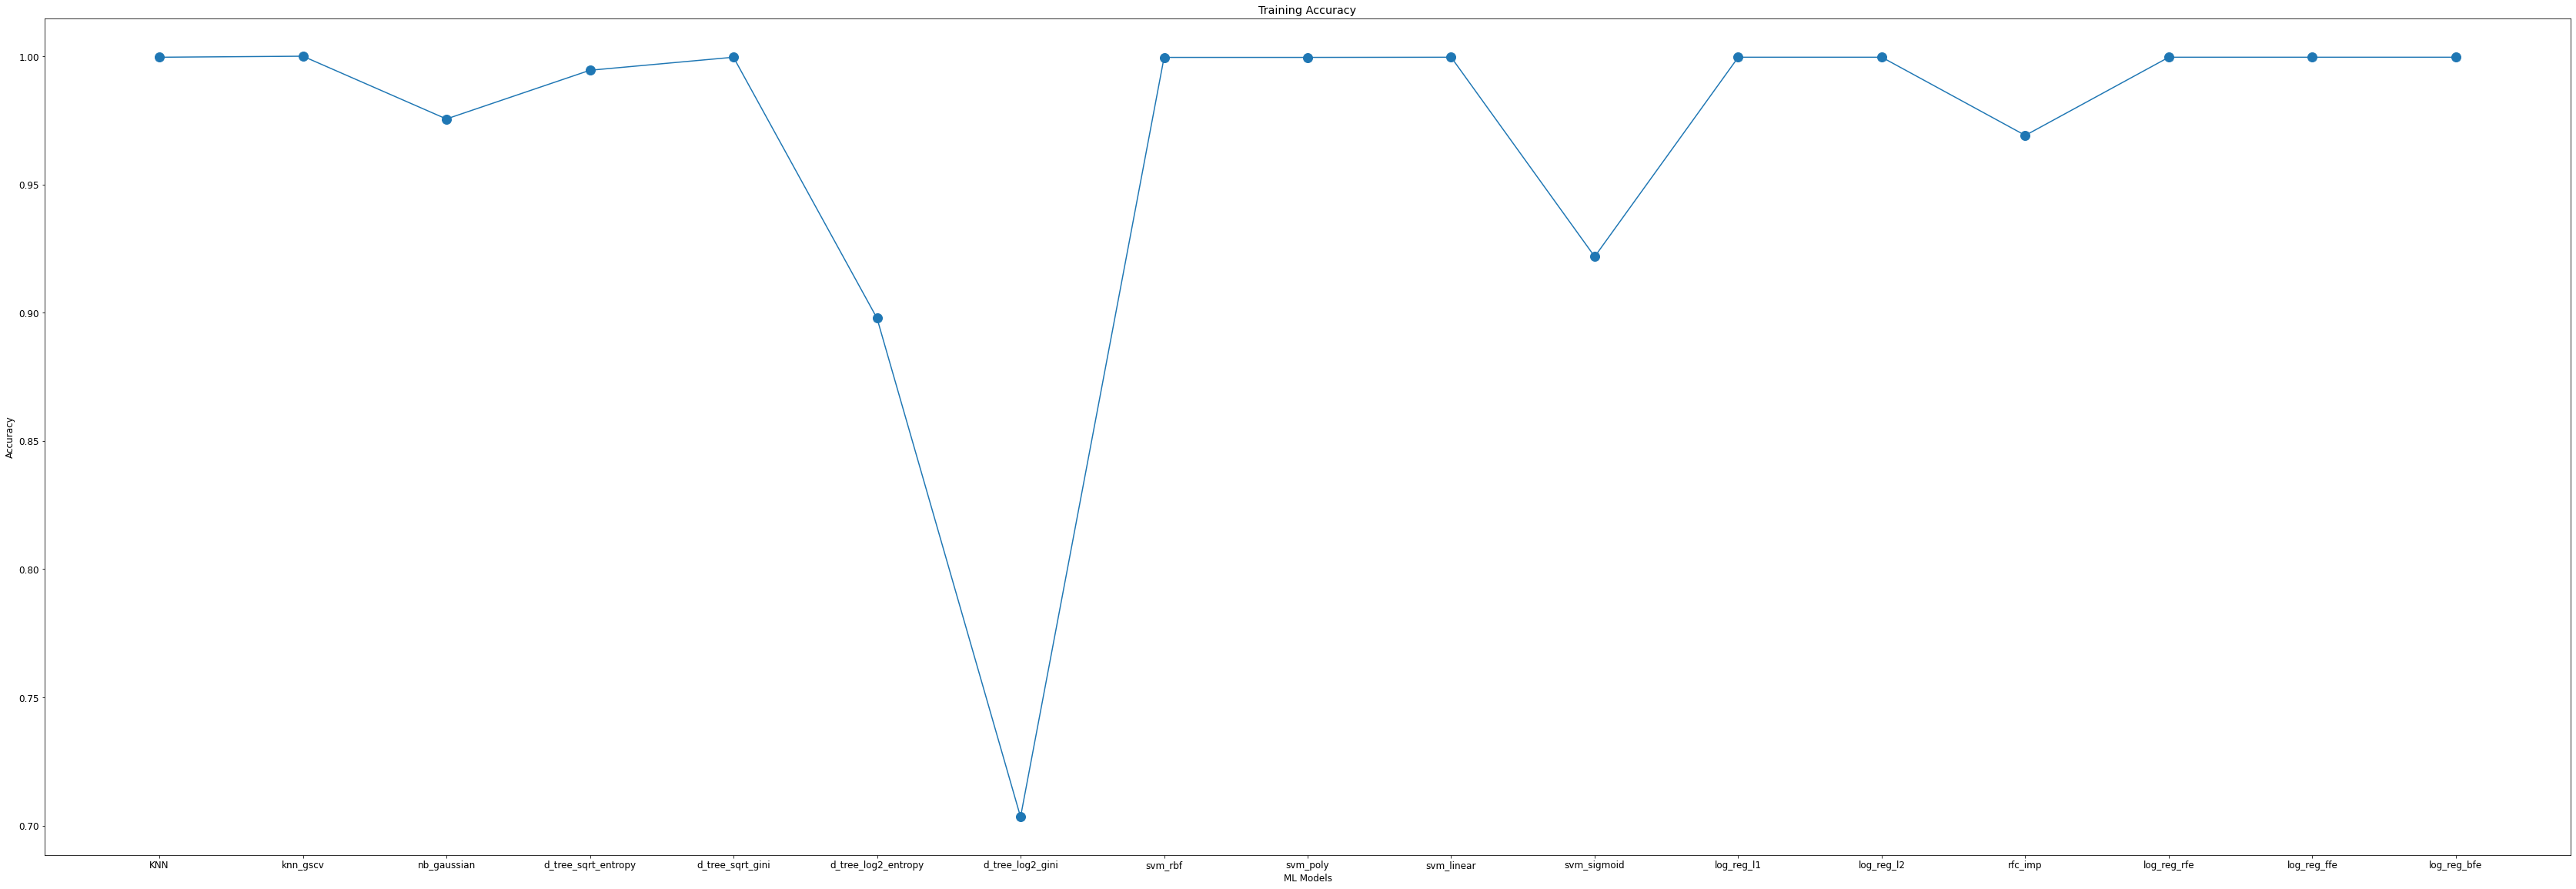

In [117]:
fig = plt.figure(figsize=(200,20))

plt.subplot(131)

plt.title('Training Accuracy')
plt.xlabel('ML Models')
plt.ylabel('Accuracy')

plt.plot(dict_training_accuracy.keys(), dict_training_accuracy.values(),  marker='o',  markersize=12)

fig.savefig('train_accuracy_line_graph.jpg',bbox_inches='tight')

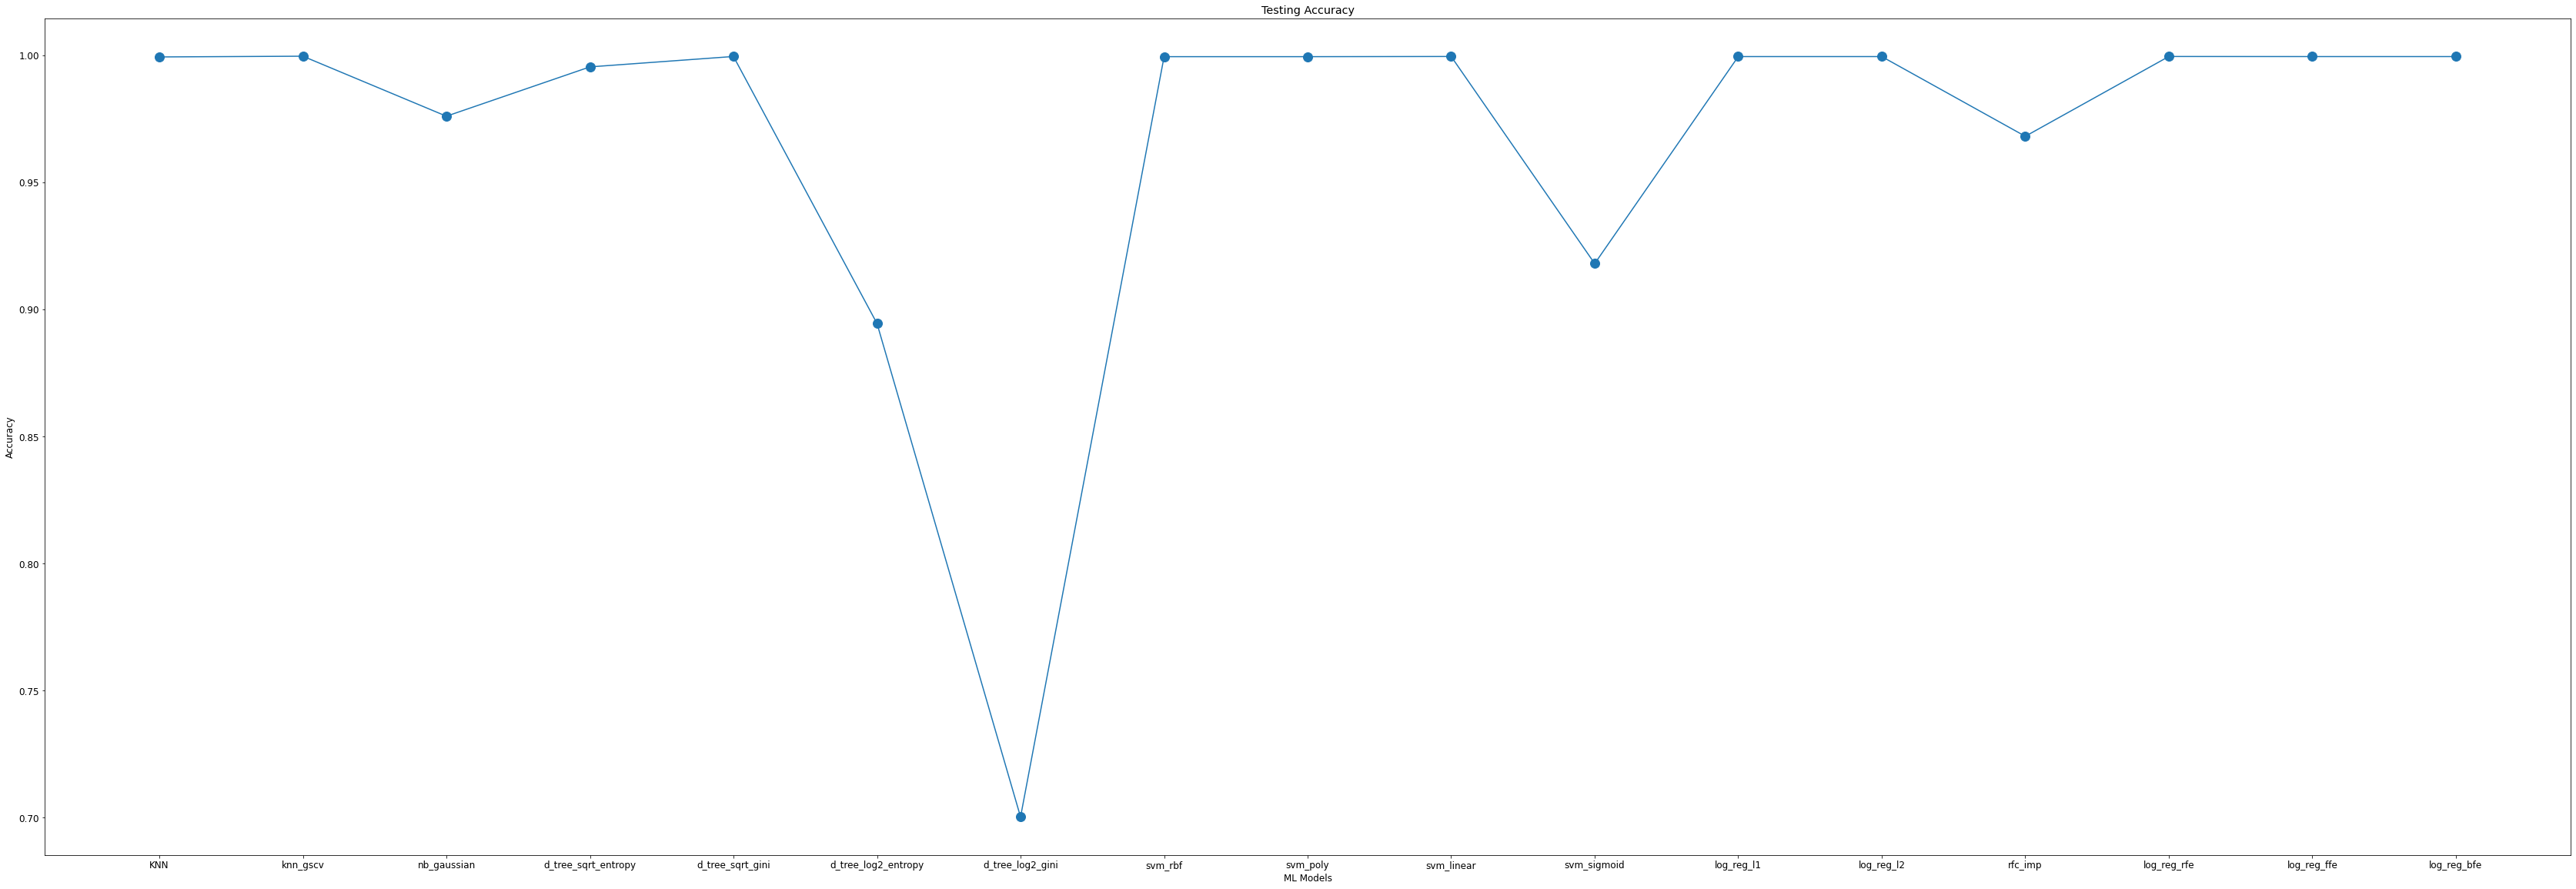

In [118]:
fig = plt.figure(figsize=(200,20))

plt.subplot(131)

plt.title('Testing Accuracy')
plt.xlabel('ML Models')
plt.ylabel('Accuracy')

plt.plot(dict_testing_accuracy.keys(), dict_testing_accuracy.values(),  marker='o',  markersize=12)
plt.show()

fig.savefig('test_accuracy_line_graph.jpg',bbox_inches='tight')

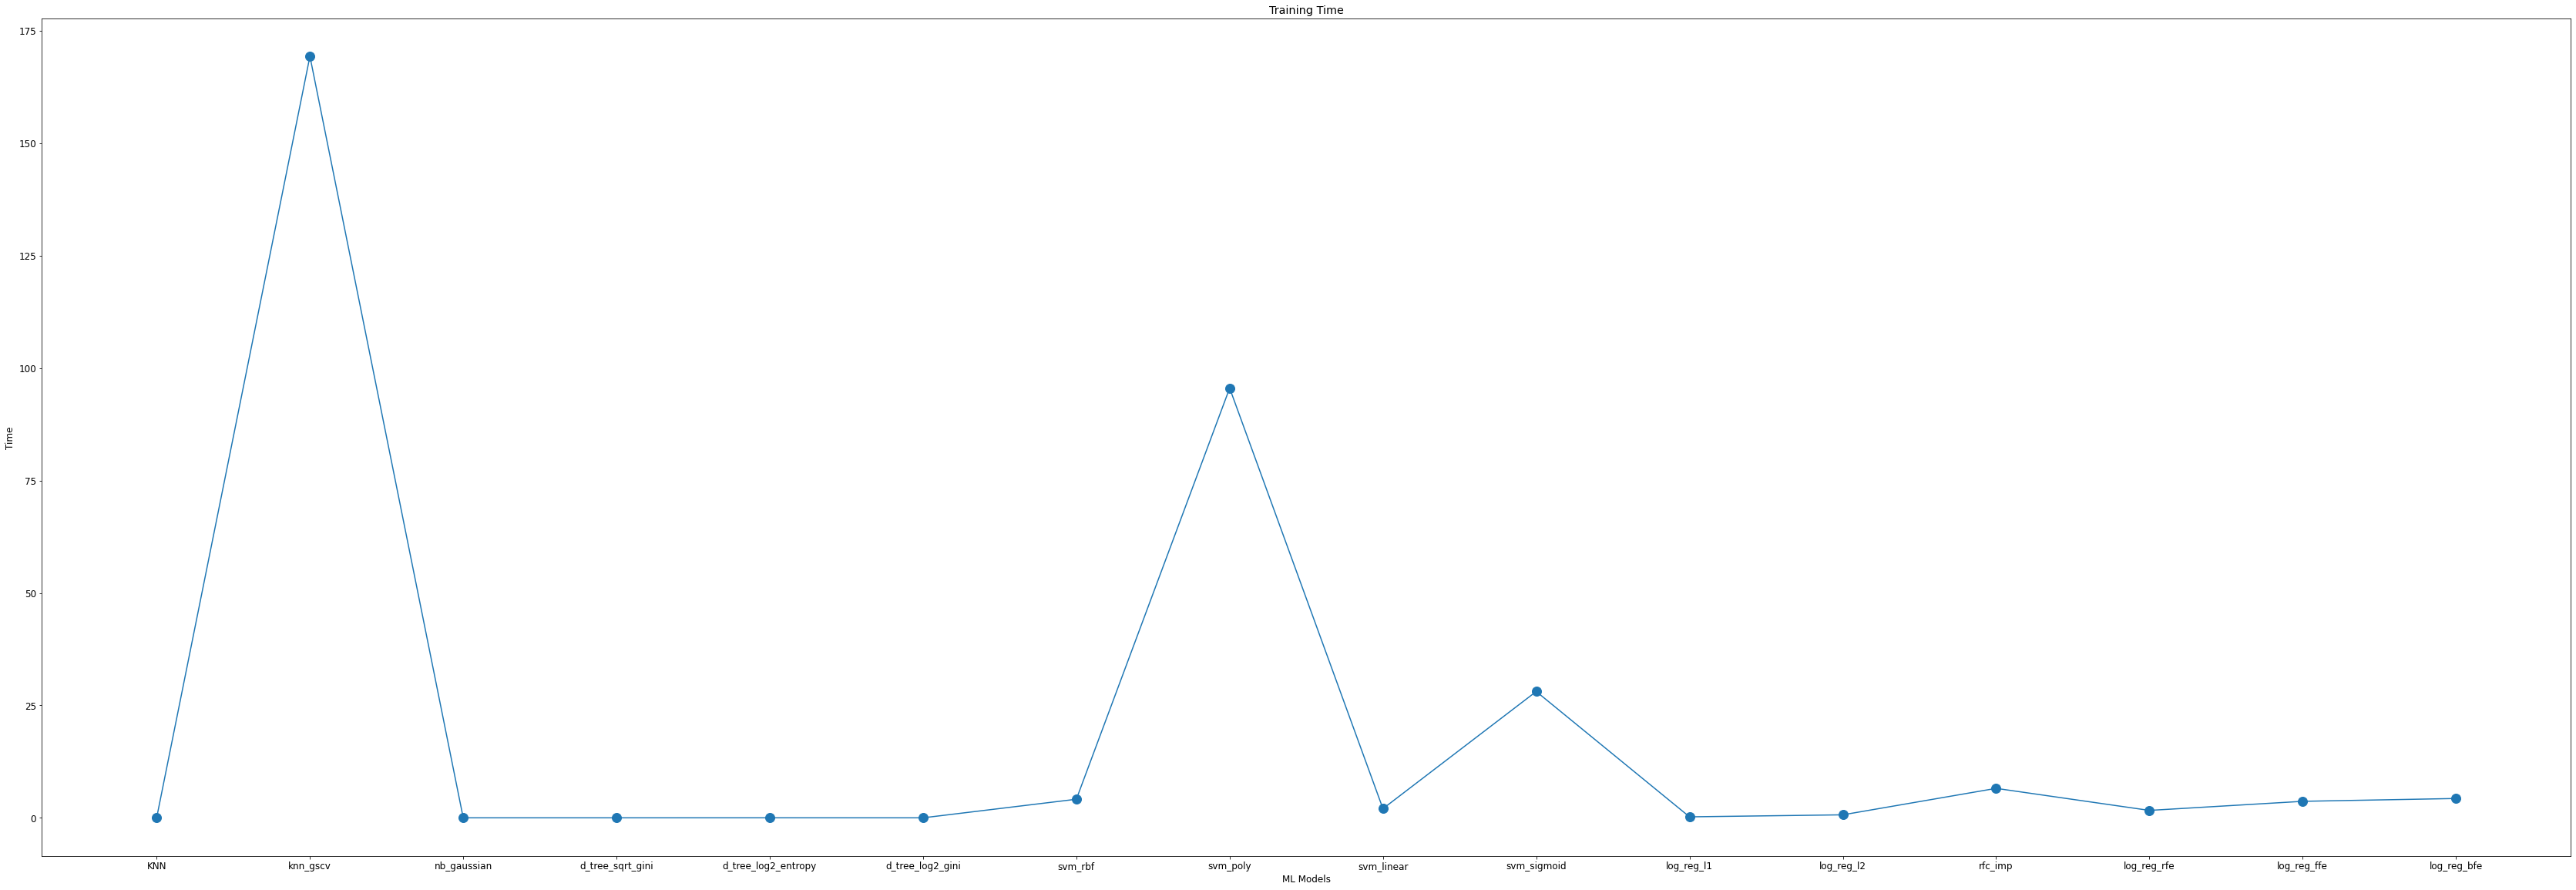

In [119]:
fig = plt.figure(figsize=(200,20))

plt.subplot(131)

plt.title('Training Time')
plt.xlabel('ML Models')
plt.ylabel('Time')


plt.plot(dict_training_time.keys(), dict_training_time.values(),  marker='o',  markersize=12)
plt.show()

fig.savefig('train_time_line_graph.jpg',bbox_inches='tight')

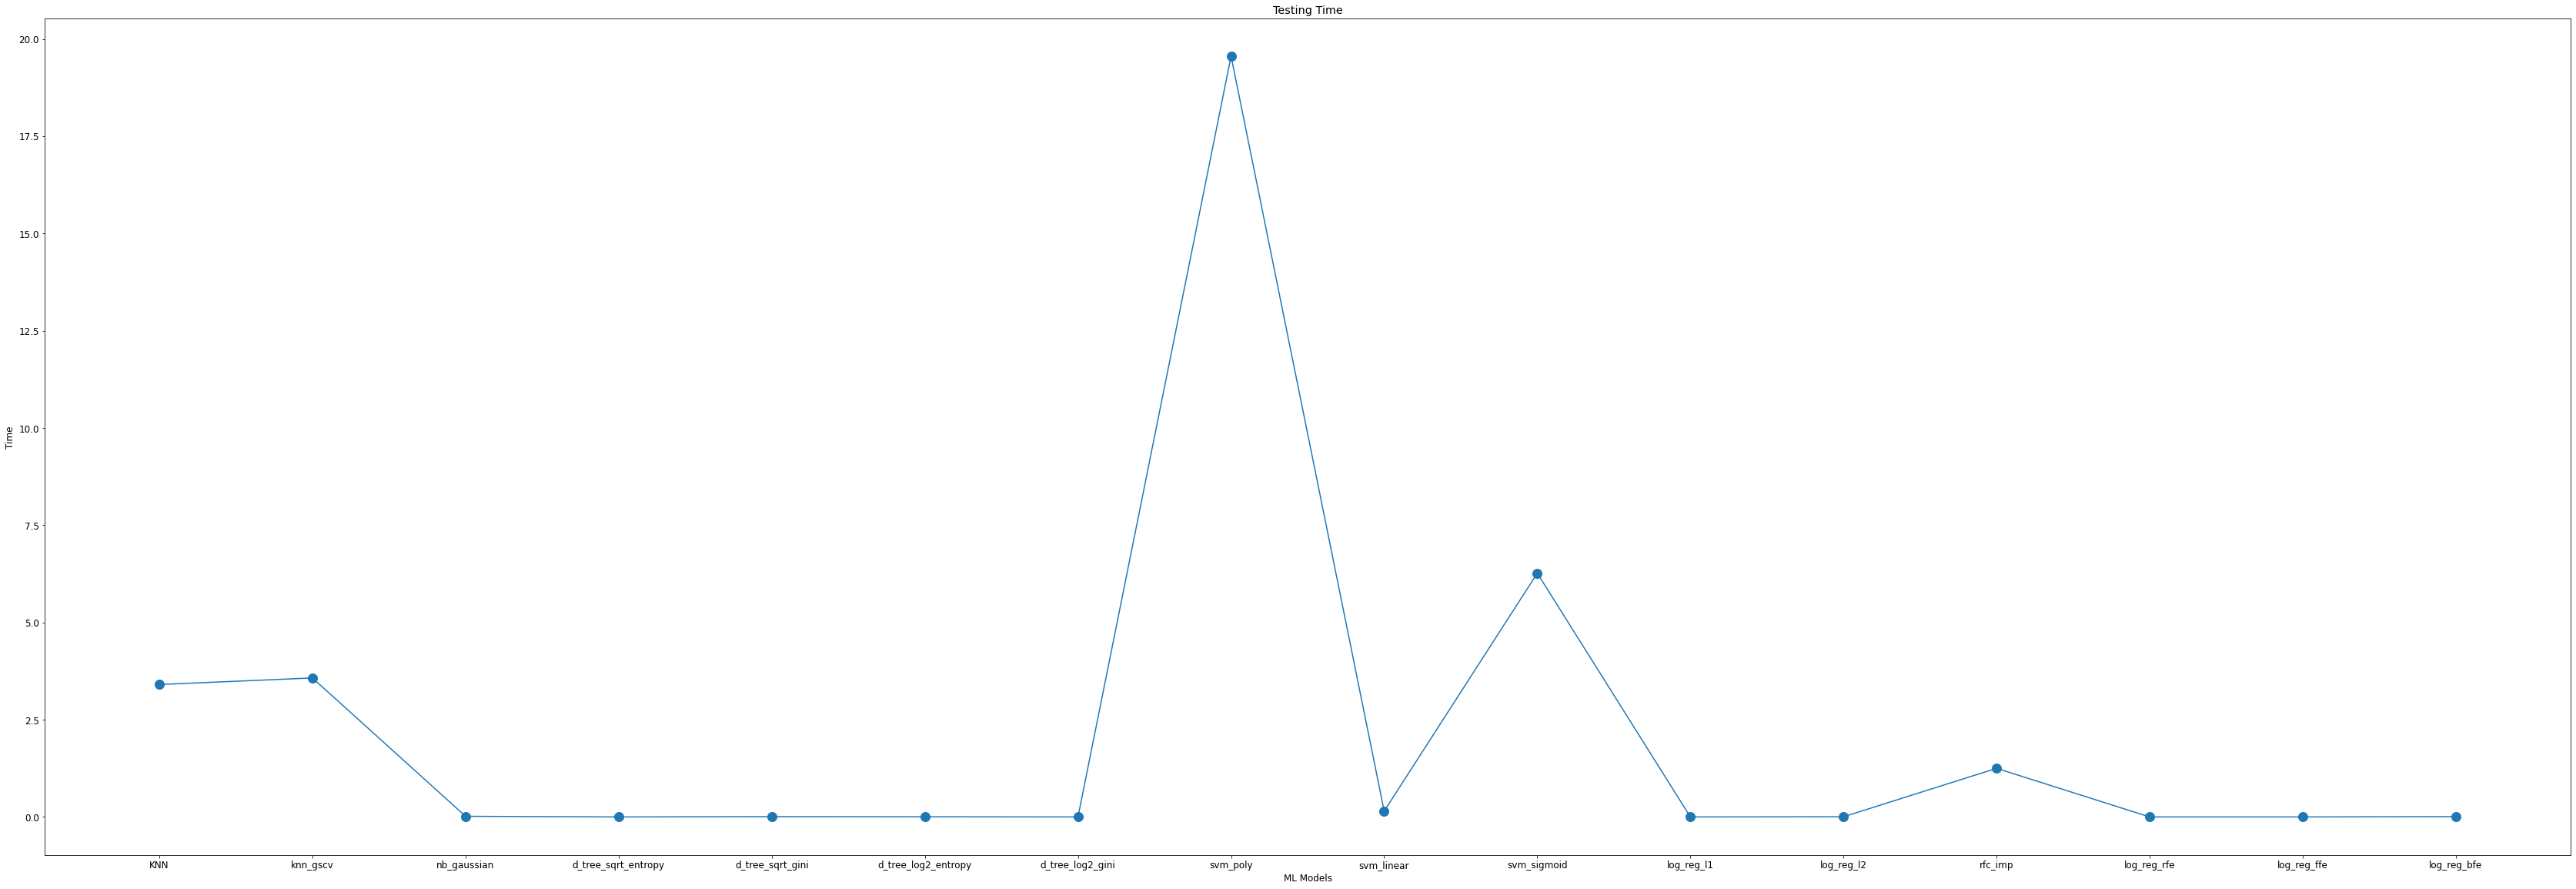

In [120]:
fig = plt.figure(figsize=(200,20))

plt.subplot(131)

plt.title('Testing Time')
plt.xlabel('ML Models')
plt.ylabel('Time')


plt.plot(dict_testing_time.keys(), dict_testing_time.values(),  marker='o',  markersize=12)
plt.show()

fig.savefig('test_time_line_graph.jpg',bbox_inches='tight')

In [121]:
max_train_accuracy = max(dict_training_accuracy.keys(), key=(lambda k: dict_training_accuracy[k]))
max_test_accuracy = max(dict_testing_accuracy.keys(), key=(lambda k: dict_testing_accuracy[k]))

min_train_accuracy = min(dict_training_accuracy.keys(), key=(lambda k: dict_training_accuracy[k]))
min_test_accuracy = min(dict_testing_accuracy.keys(), key=(lambda k: dict_testing_accuracy[k]))

# 

max_train_time = max(dict_training_time.keys(), key=(lambda k: dict_training_time[k]))
max_test_time = max(dict_testing_time.keys(), key=(lambda k: dict_testing_time[k]))

min_train_time = min(dict_training_time.keys(), key=(lambda k: dict_training_time[k]))
min_test_time = min(dict_testing_time.keys(), key=(lambda k: dict_testing_time[k]))


In [122]:
print('Algorithm: ', max_train_accuracy,'\nMax Training Accuracy:', dict_training_accuracy[max_train_accuracy])

Algorithm:  knn_gscv 
Max Training Accuracy: 1.0


In [123]:
print('Algorithm: ', max_test_accuracy,'\nMax Testing Accuracy:', dict_testing_accuracy[max_test_accuracy])

Algorithm:  knn_gscv 
Max Testing Accuracy: 0.9996046720575023


In [124]:
print('Algorithm: ', min_train_accuracy,'\nMin Training Accuracy:', dict_training_accuracy[min_train_accuracy])

Algorithm:  d_tree_log2_gini 
Min Training Accuracy: 0.7033454500646911


In [125]:
print('Algorithm: ', min_test_accuracy,'\nMin Testing Accuracy:', dict_testing_accuracy[min_test_accuracy])

Algorithm:  d_tree_log2_gini 
Min Testing Accuracy: 0.7002336028751123


In [126]:
print('Algorithm: ', max_train_time,'\nMax Training Time:', dict_training_time[max_train_time])

Algorithm:  knn_gscv 
Max Training Time: 169.29341459274292


In [127]:
print('Algorithm: ', max_test_time,'\nMax Testing Time:', dict_testing_time[max_test_time])

Algorithm:  svm_poly 
Max Testing Time: 19.55463409423828


In [128]:
print('Algorithm: ', min_train_time,'\nMin Training Time:', dict_training_time[min_train_time])

Algorithm:  KNN 
Min Training Time: 0.0064809322357177734


In [129]:
print('Algorithm: ', min_test_time,'\nMin Testing Time:', dict_testing_time[min_test_time])

Algorithm:  d_tree_sqrt_entropy 
Min Testing Time: 0.0


In [130]:
sorted(dict_training_accuracy.items(), key=lambda x: x[1], reverse=True)

[('knn_gscv', 1.0),
 ('KNN', 0.999599531760212),
 ('d_tree_sqrt_gini', 0.999599531760212),
 ('svm_linear', 0.999599531760212),
 ('log_reg_l1', 0.999599531760212),
 ('log_reg_l2', 0.999599531760212),
 ('log_reg_rfe', 0.999599531760212),
 ('log_reg_ffe', 0.999599531760212),
 ('log_reg_bfe', 0.999599531760212),
 ('svm_rbf', 0.999537921261783),
 ('svm_poly', 0.999537921261783),
 ('d_tree_sqrt_entropy', 0.994516665639825),
 ('nb_gaussian', 0.9755252294991067),
 ('rfc_imp', 0.9691177376624976),
 ('svm_sigmoid', 0.9218470827428994),
 ('d_tree_log2_entropy', 0.8978189883556158),
 ('d_tree_log2_gini', 0.7033454500646911)]

In [131]:
sorted(dict_testing_accuracy.items(), key=lambda x: x[1], reverse=True)

[('knn_gscv', 0.9996046720575023),
 ('d_tree_sqrt_gini', 0.9994968553459119),
 ('svm_linear', 0.9994968553459119),
 ('log_reg_rfe', 0.9994968553459119),
 ('log_reg_l1', 0.9994609164420485),
 ('log_reg_l2', 0.9994609164420485),
 ('log_reg_ffe', 0.9994609164420485),
 ('log_reg_bfe', 0.9994609164420485),
 ('svm_rbf', 0.999424977538185),
 ('svm_poly', 0.999424977538185),
 ('KNN', 0.9993171608265948),
 ('d_tree_sqrt_entropy', 0.9953998203054807),
 ('nb_gaussian', 0.9759928122192273),
 ('rfc_imp', 0.9680862533692722),
 ('svm_sigmoid', 0.9179874213836478),
 ('d_tree_log2_entropy', 0.8944115004492363),
 ('d_tree_log2_gini', 0.7002336028751123)]

### Ensemble Methods

### Bagging 

#### BaggingClassifier - d_tree

In [132]:
from sklearn.ensemble import BaggingClassifier

bagging_clf_d_tree = BaggingClassifier(base_estimator= d_tree_sqrt_entropy ,n_estimators=50, random_state=42, max_features=2)

In [133]:
start_time = time.time()
bagging_clf_d_tree.fit(X_train, y_train)
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["bagging_clf_d_tree"] = end_time-start_time

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training time:  1.0307552814483643


In [134]:
start_time = time.time()
y_test_bagging_clf_d_tree = bagging_clf_d_tree.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["bagging_clf_d_tree"] = end_time-start_time

Testing time:  0.11228084564208984


In [135]:
dict_training_accuracy["bagging_clf_d_tree"] =  bagging_clf_d_tree.score(X_train, y_train)
dict_testing_accuracy["bagging_clf_d_tree"] =  bagging_clf_d_tree.score(X_test, y_test)

print("Train score is:", bagging_clf_d_tree.score(X_train, y_train))
print("Test score is:",bagging_clf_d_tree.score(X_test,y_test))

Train score is: 0.9751709691331403
Test score is: 0.9754177897574124


##### Accuracy increases as no. of estimators increase

In [136]:
evaluate(bagging_clf_d_tree, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[26427  1612]
 [    0 36885]]

ACCURACY SCORE:
0.9752

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      1.000000      0.958127  0.975171      0.979063      0.976211
recall         0.942509      1.000000  0.975171      0.971254      0.975171
f1-score       0.970404      0.978616  0.975171      0.974510      0.975069
support    28039.000000  36885.000000  0.975171  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11277   684]
 [    0 15864]]

ACCURACY SCORE:
0.9754

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      1.000000      0.958666  0.975418      0.979333      0.976434
recall         0.942814      1.000000  0.975418      0.971407      0.975418
f1-score       0.970565      0.978897  0.975418      0.974731      0.975315
sup

#### BaggingClassifer svm_linear

In [137]:
from sklearn.ensemble import BaggingClassifier

bagging_clf_svm_linear = BaggingClassifier(base_estimator= svm_linear ,n_estimators=50, random_state=42, max_features=2)

In [138]:
start_time = time.time()
bagging_clf_svm_linear.fit(X_train, y_train)
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["bagging_clf_svm_linear"] = end_time-start_time

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training time:  1923.7795276641846


In [139]:
start_time = time.time()
y_test_bagging_clf_svm_linear = bagging_clf_svm_linear.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["bagging_clf_svm_linear"] = end_time-start_time

Testing time:  287.1744918823242


In [140]:
dict_training_accuracy["bagging_clf_svm_linear"] =  bagging_clf_svm_linear.score(X_train, y_train)
dict_testing_accuracy["bagging_clf_svm_linear"] =  bagging_clf_svm_linear.score(X_test, y_test)

print("Train score is:", bagging_clf_svm_linear.score(X_train, y_train))
print("Test score is:",bagging_clf_svm_linear.score(X_test,y_test))

Train score is: 0.9651130552646171
Test score is: 0.963414195867026


In [141]:
evaluate(bagging_clf_svm_linear, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[26412  1627]
 [  638 36247]]

ACCURACY SCORE:
0.9651

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.976414      0.957042  0.965113      0.966728      0.965408
recall         0.941974      0.982703  0.965113      0.962338      0.965113
f1-score       0.958885      0.969703  0.965113      0.964294      0.965031
support    28039.000000  36885.000000  0.965113  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11275   686]
 [  332 15532]]

ACCURACY SCORE:
0.9634

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.971397      0.957701  0.963414      0.964549      0.963588
recall         0.942647      0.979072  0.963414      0.960860      0.963414
f1-score       0.956806      0.968269  0.963414      0.962537      0.963341
sup

### Random Forest

#### Random Forest gini, sqrt

In [142]:
from sklearn.ensemble import RandomForestClassifier
rf_gini_sqrt = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=1, max_features='sqrt')

In [143]:
start_time = time.time()
rf_gini_sqrt.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["rf_gini_sqrt"] = end_time-start_time

Training time:  1.696115255355835


In [144]:
start_time = time.time()
y_test_rf_gini_sqrt = rf_gini_sqrt.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["rf_gini_sqrt"] = end_time-start_time

Testing time:  0.11750960350036621


In [145]:
dict_training_accuracy["rf_gini_sqrt"] =  rf_gini_sqrt.score(X_train, y_train)
dict_testing_accuracy["rf_gini_sqrt"] =  rf_gini_sqrt.score(X_test, y_test)

print("Train score is:", rf_gini_sqrt.score(X_train, y_train))
print("Test score is:",rf_gini_sqrt.score(X_test,y_test))

Train score is: 0.993453884541926
Test score is: 0.9937466307277628


In [146]:
evaluate(rf_gini_sqrt, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[27617   422]
 [    3 36882]]

ACCURACY SCORE:
0.9935

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999891      0.988688  0.993454      0.994289      0.993526
recall         0.984950      0.999919  0.993454      0.992434      0.993454
f1-score       0.992364      0.994271  0.993454      0.993318      0.993448
support    28039.000000  36885.000000  0.993454  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11790   171]
 [    3 15861]]

ACCURACY SCORE:
0.9937

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999746      0.989334  0.993747      0.994540      0.993809
recall         0.985704      0.999811  0.993747      0.992757      0.993747
f1-score       0.992675      0.994545  0.993747      0.993610      0.993741
sup

#### Random Forest gini, log2

In [147]:
from sklearn.ensemble import RandomForestClassifier
rf_gini_log2 = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=1, max_features='log2')

In [148]:
start_time = time.time()
rf_gini_log2.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["rf_gini_log2"] = end_time-start_time

Training time:  1.6002421379089355


In [149]:
start_time = time.time()
y_test_rf_gini_log2 = rf_gini_log2.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["rf_gini_log2"] = end_time-start_time

Testing time:  0.10940837860107422


In [150]:
dict_training_accuracy["rf_gini_log2"] =  rf_gini_log2.score(X_train, y_train)
dict_testing_accuracy["rf_gini_log2"] =  rf_gini_log2.score(X_test, y_test)

print("Train score is:", rf_gini_log2.score(X_train, y_train))
print("Test score is:",rf_gini_log2.score(X_test,y_test))

Train score is: 0.9928839874314583
Test score is: 0.9932434860736747


In [151]:
evaluate(rf_gini_log2, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[27598   441]
 [   21 36864]]

ACCURACY SCORE:
0.9929

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999240      0.988179  0.992884      0.993709      0.992956
recall         0.984272      0.999431  0.992884      0.991851      0.992884
f1-score       0.991699      0.993773  0.992884      0.992736      0.992877
support    28039.000000  36885.000000  0.992884  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11788   173]
 [   15 15849]]

ACCURACY SCORE:
0.9932

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.998729      0.989202  0.993243      0.993966      0.993298
recall         0.985536      0.999054  0.993243      0.992295      0.993243
f1-score       0.992089      0.994104  0.993243      0.993096      0.993238
sup

#### Random Forest entropy, log2

In [152]:
from sklearn.ensemble import RandomForestClassifier
rf_entropy_log2 = RandomForestClassifier(criterion='entropy', n_estimators=100, max_depth=1, max_features='log2')

In [153]:
start_time = time.time()
rf_entropy_log2.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["rf_entropy_log2"] = end_time-start_time

Training time:  1.7147736549377441


In [154]:
start_time = time.time()
y_test_rf_entropy_log2 = rf_entropy_log2.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["rf_entropy_log2"] = end_time-start_time

Testing time:  0.11431002616882324


In [155]:
dict_training_accuracy["rf_entropy_log2"] =  rf_entropy_log2.score(X_train, y_train)
dict_testing_accuracy["rf_entropy_log2"] =  rf_entropy_log2.score(X_test, y_test)

print("Train score is:", rf_entropy_log2.score(X_train, y_train))
print("Test score is:",rf_entropy_log2.score(X_test,y_test))

Train score is: 0.9939929764031791
Test score is: 0.9946091644204852


In [156]:
evaluate(rf_entropy_log2, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[27652   387]
 [    3 36882]]

ACCURACY SCORE:
0.9940

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999892      0.989616  0.993993      0.994754      0.994054
recall         0.986198      0.999919  0.993993      0.993058      0.993993
f1-score       0.992997      0.994741  0.993993      0.993869      0.993988
support    28039.000000  36885.000000  0.993993  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11814   147]
 [    3 15861]]

ACCURACY SCORE:
0.9946

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999746      0.990817  0.994609      0.995282      0.994655
recall         0.987710      0.999811  0.994609      0.993760      0.994609
f1-score       0.993692      0.995294  0.994609      0.994493      0.994605
sup

#### Random Forest entropy, sqrt

In [157]:
from sklearn.ensemble import RandomForestClassifier
rf_entropy_sqrt = RandomForestClassifier(criterion='entropy', n_estimators=100, max_depth=1)

In [158]:
start_time = time.time()
rf_entropy_sqrt.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["rf_entropy_sqrt"] = end_time-start_time

Training time:  1.7367608547210693


In [159]:
start_time = time.time()
y_test_rf_entropy_sqrt = rf_entropy_sqrt.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["rf_entropy_sqrt"] = end_time-start_time

Testing time:  0.11719131469726562


In [160]:
dict_training_accuracy["rf_entropy_sqrt"] =  rf_entropy_sqrt.score(X_train, y_train)
dict_testing_accuracy["rf_entropy_sqrt"] =  rf_entropy_sqrt.score(X_test, y_test)

print("Train score is:", rf_entropy_sqrt.score(X_train, y_train))
print("Test score is:",rf_entropy_sqrt.score(X_test,y_test))

Train score is: 0.9936079107879983
Test score is: 0.9941060197663971


In [161]:
evaluate(rf_entropy_sqrt, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[27627   412]
 [    3 36882]]

ACCURACY SCORE:
0.9936

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999891      0.988953  0.993608      0.994422      0.993677
recall         0.985306      0.999919  0.993608      0.992612      0.993608
f1-score       0.992545      0.994405  0.993608      0.993475      0.993602
support    28039.000000  36885.000000  0.993608  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11800   161]
 [    3 15861]]

ACCURACY SCORE:
0.9941

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999746      0.989951  0.994106      0.994849      0.994162
recall         0.986540      0.999811  0.994106      0.993175      0.994106
f1-score       0.993099      0.994857  0.994106      0.993978      0.994101
sup

#### Extra Tree Classifier

In [162]:
from sklearn.ensemble import ExtraTreesClassifier
ext_classifier = ExtraTreesClassifier(max_depth=1)

In [163]:

start_time = time.time()
ext_classifier.fit(X_train, y_train)
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["ext_classifier"] = end_time-start_time

Training time:  0.703495979309082


In [164]:
start_time = time.time()
y_test_ext_classifier = ext_classifier.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["ext_classifier"] = end_time-start_time

Testing time:  0.11047887802124023


In [165]:
dict_training_accuracy["ext_classifier"] =  ext_classifier.score(X_train, y_train)
dict_testing_accuracy["ext_classifier"] =  ext_classifier.score(X_test, y_test)

print("Train score is:", ext_classifier.score(X_train, y_train))
print("Test score is:",ext_classifier.score(X_test,y_test))

Train score is: 0.9332296223276446
Test score is: 0.9330458221024259


In [166]:
evaluate(ext_classifier, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[23704  4335]
 [    0 36885]]

ACCURACY SCORE:
0.9332

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      1.000000      0.894833   0.93323      0.947416      0.940252
recall         0.845394      1.000000   0.93323      0.922697      0.933230
f1-score       0.916221      0.944498   0.93323      0.930359      0.932286
support    28039.000000  36885.000000   0.93323  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[10099  1862]
 [    1 15863]]

ACCURACY SCORE:
0.9330

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999901      0.894951  0.933046      0.947426      0.940065
recall         0.844327      0.999937  0.933046      0.922132      0.933046
f1-score       0.915552      0.944535  0.933046      0.930044      0.932077
sup

#### Extra Tree Classifier entropy ,int ,log2

In [167]:
from sklearn.ensemble import ExtraTreesClassifier
ext_classifier_entropy_log2 = ExtraTreesClassifier(n_estimators=1000, max_depth=2, max_features='log2', criterion='entropy')

In [168]:

start_time = time.time()
ext_classifier_entropy_log2.fit(X_train, y_train)
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["ext_classifier_entropy_log2"] = end_time-start_time

Training time:  8.92596983909607


In [169]:
start_time = time.time()
y_test_ext_classifier_entropy_log2 = ext_classifier_entropy_log2.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["ext_classifier_entropy_log2"] = end_time-start_time

Testing time:  1.1627881526947021


In [170]:
dict_training_accuracy["ext_classifier_entropy_log2"] =  ext_classifier_entropy_log2.score(X_train, y_train)
dict_testing_accuracy["ext_classifier_entropy_log2"] =  ext_classifier_entropy_log2.score(X_test, y_test)

print("Train score is:", ext_classifier_entropy_log2.score(X_train, y_train))
print("Test score is:",ext_classifier_entropy_log2.score(X_test,y_test))

Train score is: 0.9752325796315692
Test score is: 0.9755974842767295


In [171]:
evaluate(ext_classifier_entropy_log2, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[26450  1589]
 [   19 36866]]

ACCURACY SCORE:
0.9752

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999282      0.958679  0.975233      0.978981      0.976214
recall         0.943329      0.999485  0.975233      0.971407      0.975233
f1-score       0.970500      0.978657  0.975233      0.974578      0.975134
support    28039.000000  36885.000000  0.975233  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11292   669]
 [   10 15854]]

ACCURACY SCORE:
0.9756

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999115      0.959511  0.975597      0.979313      0.976535
recall         0.944068      0.999370  0.975597      0.971719      0.975597
f1-score       0.970812      0.979035  0.975597      0.974923      0.975500
sup

### Boosting 



#### AdaBoost Classfier , base_estimator= d_tree_sqrt_entropy

In [172]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf_d_tree = AdaBoostClassifier(base_estimator= d_tree_sqrt_entropy ,n_estimators=1, learning_rate=0.30)

In [173]:
start_time = time.time()
ada_boost_clf_d_tree.fit(X_train, y_train)
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["ada_boost_clf_d_tree"] = end_time-start_time

Training time:  0.08596158027648926


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [174]:
start_time = time.time()
y_test_ada_boost_clf_d_tree = ada_boost_clf_d_tree.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["ada_boost_clf_d_tree"] = end_time-start_time

Testing time:  0.0


In [175]:
dict_training_accuracy["ada_boost_clf_d_tree"] =  ada_boost_clf_d_tree.score(X_train, y_train)
dict_testing_accuracy["ada_boost_clf_d_tree"] =  ada_boost_clf_d_tree.score(X_test, y_test)

print("Train score is:", ada_boost_clf_d_tree.score(X_train, y_train))
print("Test score is:",ada_boost_clf_d_tree.score(X_test,y_test))

Train score is: 0.99293019530528
Test score is: 0.9928122192273136


In [176]:
evaluate(ada_boost_clf_d_tree, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[27763   276]
 [  183 36702]]

ACCURACY SCORE:
0.9929

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.993452      0.992536   0.99293      0.992994      0.992932
recall         0.990157      0.995039   0.99293      0.992598      0.992930
f1-score       0.991801      0.993786   0.99293      0.992794      0.992929
support    28039.000000  36885.000000   0.99293  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11843   118]
 [   82 15782]]

ACCURACY SCORE:
0.9928

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.993124      0.992579  0.992812      0.992851      0.992813
recall         0.990135      0.994831  0.992812      0.992483      0.992812
f1-score       0.991627      0.993704  0.992812      0.992665      0.992811
sup

#### AdaBoostClassifier base_estimator= nb_gaussian

In [177]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf_nb = AdaBoostClassifier(base_estimator= nb_gaussian ,n_estimators=30)  

In [178]:
start_time = time.time()
ada_boost_clf_nb.fit(X_train, y_train)
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["ada_boost_clf_nb"] = end_time-start_time

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training time:  2.460901975631714


In [179]:
start_time = time.time()
y_test_ada_boost_clf_nb = ada_boost_clf_nb.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["ada_boost_clf_nb"] = end_time-start_time

Testing time:  0.5139365196228027


In [180]:
dict_training_accuracy["ada_boost_clf_nb"] =  ada_boost_clf_nb.score(X_train, y_train)
dict_testing_accuracy["ada_boost_clf_nb"] =  ada_boost_clf_nb.score(X_test, y_test)

print("Train score is:", ada_boost_clf_nb.score(X_train, y_train))
print("Test score is:",ada_boost_clf_nb.score(X_test,y_test))

Train score is: 1.0
Test score is: 1.0


In [181]:
evaluate(ada_boost_clf_nb, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[28039     0]
 [    0 36885]]

ACCURACY SCORE:
1.0000

CLASSIFICATION REPORT:
           No Intrusion  Intrusion  accuracy  macro avg  weighted avg
precision           1.0        1.0       1.0        1.0           1.0
recall              1.0        1.0       1.0        1.0           1.0
f1-score            1.0        1.0       1.0        1.0           1.0
support         28039.0    36885.0       1.0    64924.0       64924.0
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11961     0]
 [    0 15864]]

ACCURACY SCORE:
1.0000

CLASSIFICATION REPORT:
           No Intrusion  Intrusion  accuracy  macro avg  weighted avg
precision           1.0        1.0       1.0        1.0           1.0
recall              1.0        1.0       1.0        1.0           1.0
f1-score            1.0        1.0       1.0        1.0           1.0
support         11961.0    15864.0       1.0    27825.0  

In [182]:
# svm, log reg take infinite time with Adaboost Classifier or give probabolity error

In [183]:
from xgboost import XGBClassifier
xgb_clf=XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,nthread=4,scale_pos_weight=1,seed=27)

In [184]:
start_time = time.time()
xgb_clf.fit(X_train, y_train)
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["xgb_clf"] = end_time-start_time

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:31:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training time:  10.579418420791626


In [185]:
start_time = time.time()
y_test_xgb_clf = xgb_clf.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["xgb_clf"] = end_time-start_time

Testing time:  0.045746803283691406


In [186]:
dict_training_accuracy["xgb_clf"] =  xgb_clf.score(X_train, y_train)
dict_testing_accuracy["xgb_clf"] =  xgb_clf.score(X_test, y_test)

print("Train score is:", xgb_clf.score(X_train, y_train))
print("Test score is:",xgb_clf.score(X_test,y_test))

Train score is: 1.0
Test score is: 1.0


In [187]:
evaluate(xgb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[28039     0]
 [    0 36885]]

ACCURACY SCORE:
1.0000

CLASSIFICATION REPORT:
           No Intrusion  Intrusion  accuracy  macro avg  weighted avg
precision           1.0        1.0       1.0        1.0           1.0
recall              1.0        1.0       1.0        1.0           1.0
f1-score            1.0        1.0       1.0        1.0           1.0
support         28039.0    36885.0       1.0    64924.0       64924.0
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11961     0]
 [    0 15864]]

ACCURACY SCORE:
1.0000

CLASSIFICATION REPORT:
           No Intrusion  Intrusion  accuracy  macro avg  weighted avg
precision           1.0        1.0       1.0        1.0           1.0
recall              1.0        1.0       1.0        1.0           1.0
f1-score            1.0        1.0       1.0        1.0           1.0
support         11961.0    15864.0       1.0    27825.0  

### Gradient Boosting

In [188]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=30, loss='log_loss', max_depth=1, init=d_tree_sqrt_entropy, random_state=42, max_features='log2')

In [189]:
start_time = time.time()
grad_boost_clf.fit(X_train, y_train)
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["grad_boost_clf"] = end_time-start_time


Training time:  0.704714298248291


In [190]:
start_time = time.time()
y_test_grad_boost_clf = grad_boost_clf.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["grad_boost_clf"] = end_time-start_time


Testing time:  0.015505075454711914


In [191]:
dict_training_accuracy["grad_boost_clf"] =  grad_boost_clf.score(X_train, y_train)
dict_testing_accuracy["grad_boost_clf"] =  grad_boost_clf.score(X_test, y_test)

print("Train score is:", grad_boost_clf.score(X_train, y_train))
print("Test score is:",grad_boost_clf.score(X_test,y_test))


Train score is: 0.9921754666995256
Test score is: 0.9923450134770889


In [192]:
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[27679   360]
 [  148 36737]]

ACCURACY SCORE:
0.9922

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.994681      0.990296  0.992175      0.992489      0.992190
recall         0.987161      0.995988  0.992175      0.991574      0.992175
f1-score       0.990907      0.993133  0.992175      0.992020      0.992172
support    28039.000000  36885.000000  0.992175  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11832   129]
 [   84 15780]]

ACCURACY SCORE:
0.9923

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.992951      0.991891  0.992345      0.992421      0.992347
recall         0.989215      0.994705  0.992345      0.991960      0.992345
f1-score       0.991079      0.993296  0.992345      0.992188      0.992343
sup

In [193]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf_nb = GradientBoostingClassifier(n_estimators=30, loss='log_loss', max_depth=1, init=nb_gaussian, random_state=42, max_features='log2')

In [194]:
start_time = time.time()
grad_boost_clf_nb.fit(X_train, y_train)
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["grad_boost_clf_nb"] = end_time-start_time


Training time:  0.7503411769866943


In [195]:
start_time = time.time()
y_test_grad_boost_clf_nb = grad_boost_clf.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["grad_boost_clf_nb"] = end_time-start_time


Testing time:  0.0


In [196]:
dict_training_accuracy["grad_boost_clf_nb"] =  grad_boost_clf_nb.score(X_train, y_train)
dict_testing_accuracy["grad_boost_clf_nb"] =  grad_boost_clf_nb.score(X_test, y_test)

print("Train score is:", grad_boost_clf_nb.score(X_train, y_train))
print("Test score is:",grad_boost_clf_nb.score(X_test,y_test))


Train score is: 0.6846928716653318
Test score is: 0.6883378256963163


In [197]:
evaluate(grad_boost_clf_nb, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[24468  3571]
 [16900 19985]]

ACCURACY SCORE:
0.6847

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.591472      0.848404  0.684693      0.719938      0.737441
recall         0.872642      0.541819  0.684693      0.707230      0.684693
f1-score       0.705059      0.661306  0.684693      0.683182      0.680202
support    28039.000000  36885.000000  0.684693  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[10410  1551]
 [ 7121  8743]]

ACCURACY SCORE:
0.6883

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.593805      0.849330  0.688338      0.721567      0.739489
recall         0.870329      0.551122  0.688338      0.710725      0.688338
f1-score       0.705954      0.668476  0.688338      0.687215      0.684587
sup

### Stacking Ensemble

In [198]:
from sklearn.ensemble import StackingClassifier

classifiers_best = [('d_tree_sqrt_entropy', d_tree_sqrt_entropy ), 
                   ('svm_linear',svm_linear),
#                    ('log_reg_l1',log_reg_l1),
                    ('rf_entropy_log2',rf_entropy_log2),
                    ('nb_gaussian',nb_gaussian),
                    ('ext_classifier_entropy_log2',ext_classifier_entropy_log2)
                   ]


stacking_clf = StackingClassifier(estimators=classifiers_best, final_estimator=log_reg_l1, cv=5)

In [199]:
start_time = time.time()
stacking_clf.fit(X_train, y_train)
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["stacking_clf"] = end_time-start_time


Training time:  66.16114139556885


In [200]:
start_time = time.time()
y_test_stacking_clf = stacking_clf.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["stacking_clf"] = end_time-start_time


Testing time:  1.4628446102142334


In [201]:

#
dict_training_accuracy["stacking_clf"] =  stacking_clf.score(X_train, y_train)
dict_testing_accuracy["stacking_clf"] =  stacking_clf.score(X_test, y_test)

print("Train score is:", stacking_clf.score(X_train, y_train))
print("Test score is:",stacking_clf.score(X_test,y_test))

Train score is: 0.9979822561764524
Test score is: 0.9986343216531895


In [202]:
evaluate(stacking_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[27934   105]
 [   26 36859]]

ACCURACY SCORE:
0.9980

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999070      0.997159  0.997982      0.998115      0.997985
recall         0.996255      0.999295  0.997982      0.997775      0.997982
f1-score       0.997661      0.998226  0.997982      0.997943      0.997982
support    28039.000000  36885.000000  0.997982  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11937    24]
 [   14 15850]]

ACCURACY SCORE:
0.9986

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.998829      0.998488  0.998634      0.998658      0.998634
recall         0.997993      0.999117  0.998634      0.998555      0.998634
f1-score       0.998411      0.998803  0.998634      0.998607      0.998634
sup

### Voting Ensemble

In [203]:
from sklearn.ensemble import  VotingClassifier


classifiers_best = [('d_tree_sqrt_entropy', d_tree_sqrt_entropy ), 
                   ('svm_linear',svm_linear),
                   ('log_reg_l1',log_reg_l1),
                    ('rf_entropy_log2',rf_entropy_log2),
                    ('nb_gaussian',nb_gaussian),
#                     ('ext_classifier_entropy_log2',ext_classifier_entropy_log2)
                   ]


voting_clf = VotingClassifier(estimators=classifiers_best, 
                              weights=[0.99, 0.88, 0.77, 0.50, 0.10], 
                              voting='hard')

#best weights = weights=[0.99, 0.88, 0.77, 0.50, 0.10]

In [204]:
start_time = time.time()
voting_clf.fit(X_train, y_train)
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["voting_clf"] = end_time-start_time


Training time:  3.9787988662719727


In [205]:
start_time = time.time()
y_test_voting_clf = voting_clf.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["voting_clf"] = end_time-start_time


Testing time:  0.4498097896575928


In [206]:

#
dict_training_accuracy["voting_clf"] =  voting_clf.score(X_train, y_train)
dict_testing_accuracy["voting_clf"] =  voting_clf.score(X_test, y_test)

print("Train score is:", voting_clf.score(X_train, y_train))
print("Test score is:",voting_clf.score(X_test,y_test))

Train score is: 0.999599531760212
Test score is: 0.9994609164420485


In [207]:
evaluate(voting_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[28039     0]
 [   26 36859]]

ACCURACY SCORE:
0.9996

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999074      1.000000    0.9996      0.999537        0.9996
recall         1.000000      0.999295    0.9996      0.999648        0.9996
f1-score       0.999537      0.999647    0.9996      0.999592        0.9996
support    28039.000000  36885.000000    0.9996  64924.000000    64924.0000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11960     1]
 [   14 15850]]

ACCURACY SCORE:
0.9995

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.998831      0.999937  0.999461      0.999384      0.999461
recall         0.999916      0.999117  0.999461      0.999517      0.999461
f1-score       0.999373      0.999527  0.999461      0.999450      0.999461
sup

### Voting Ensemble soft voting


In [208]:

from sklearn.metrics import accuracy_score

scores = [dict_testing_accuracy['d_tree_sqrt_entropy'], 
#           dict_testing_accuracy['svm_linear'], 
          dict_testing_accuracy['log_reg_l1'], 
          dict_testing_accuracy['rf_entropy_log2'],
          dict_testing_accuracy['nb_gaussian'],
          dict_testing_accuracy['ext_classifier_entropy_log2'],
          
         ]

In [209]:
from sklearn.ensemble import  VotingClassifier


classifiers_best = [('d_tree_sqrt_entropy', d_tree_sqrt_entropy ), 
#                    ('svm_linear',svm_linear),
                   ('log_reg_l1',log_reg_l1),
                    ('rf_entropy_log2',rf_entropy_log2),
                    ('nb_gaussian',nb_gaussian),
                    ('ext_classifier_entropy_log2',ext_classifier_entropy_log2)
                   ]


voting_clf_soft = VotingClassifier(estimators=classifiers_best, weights=scores, voting='soft', )


In [210]:
start_time = time.time()
voting_clf_soft.fit(X_train, y_train)
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["voting_clf_soft"] = end_time-start_time


Training time:  10.885252952575684


In [211]:
start_time = time.time()
y_test_voting_clf_soft = voting_clf_soft.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["voting_clf_soft"] = end_time-start_time


Testing time:  1.3222272396087646


In [212]:

#
dict_training_accuracy["voting_clf_soft"] =  voting_clf_soft.score(X_train, y_train)
dict_testing_accuracy["voting_clf_soft"] =  voting_clf_soft.score(X_test, y_test)

print("Train score is:", voting_clf_soft.score(X_train, y_train))
print("Test score is:",voting_clf_soft.score(X_test,y_test))

Train score is: 0.9978744378042018
Test score is: 0.9983827493261456


In [213]:
evaluate(voting_clf_soft, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[27920   119]
 [   19 36866]]

ACCURACY SCORE:
0.9979

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999320      0.996782  0.997874      0.998051      0.997878
recall         0.995756      0.999485  0.997874      0.997620      0.997874
f1-score       0.997535      0.998132  0.997874      0.997833      0.997874
support    28039.000000  36885.000000  0.997874  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11928    33]
 [   12 15852]]

ACCURACY SCORE:
0.9984

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.998995      0.997923  0.998383      0.998459      0.998384
recall         0.997241      0.999244  0.998383      0.998242      0.998383
f1-score       0.998117      0.998583  0.998383      0.998350      0.998383
sup

In [214]:


# def poly_kernel(x_i, x_j):
#     return x_i.dot(x_j.T) 

In [215]:
# svm_custom_poly = SVC(kernel=poly_kernel, gamma='scale')

In [216]:
# start_time = time.time()
# svm_custom_poly.fit(X_train, y_train.values.ravel())
# end_time = time.time()
# print("Training time: ",end_time-start_time)

# dict_training_time["svm_custom_poly"] = end_time-start_time

In [217]:
# start_time = time.time()
# y_test_svm_custom_poly = svm_custom_poly.predict(X_test)
# end_time = time.time()
# print("Testing time: ",end_time-start_time)

# dict_testing_time["svm_custom_poly"] = end_time-start_time

In [218]:
# dict_training_accuracy["svm_custom_poly"] = svm_custom_poly.score(X_train, y_train)
# dict_testing_accuracy["svm_custom_poly"] = svm_custom_poly.score(X_test,y_test)

# print("Train score is:", svm_custom_poly.score(X_train, y_train))
# print("Test score is:", svm_custom_poly.score(X_test,y_test))

In [219]:
# import numpy as np
# def get_gram(x1, x2, kernel):
#     return np.array([[kernel(_x1, _x2) for _x2 in x2] for _x1 in x1])
# def RBF(x1, x2, gamma  = 1):
#     return np.exp(-gamma*np.linalg.norm(x1-x2))

In [220]:
# ### Hybrid Kernel SVM

# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

# clf1 = SVC(kernel = 'precomputed')
# clf1.fit(get_gram(X_train, X_train, RBF), y_train)
# print(f'Accuracy on Custom Kernel: {accuracy_score(y_test, clf1.predict(get_gram(X_test, X_train, RBF)))}')

## Results

In [221]:
dict_training_accuracy

{'KNN': 0.999599531760212,
 'knn_gscv': 1.0,
 'nb_gaussian': 0.9755252294991067,
 'd_tree_sqrt_entropy': 0.994516665639825,
 'd_tree_sqrt_gini': 0.999599531760212,
 'd_tree_log2_entropy': 0.8978189883556158,
 'd_tree_log2_gini': 0.7033454500646911,
 'svm_rbf': 0.999537921261783,
 'svm_poly': 0.999537921261783,
 'svm_linear': 0.999599531760212,
 'svm_sigmoid': 0.9218470827428994,
 'log_reg_l1': 0.999599531760212,
 'log_reg_l2': 0.999599531760212,
 'rfc_imp': 0.9691177376624976,
 'log_reg_rfe': 0.999599531760212,
 'log_reg_ffe': 0.999599531760212,
 'log_reg_bfe': 0.999599531760212,
 'bagging_clf_d_tree': 0.9751709691331403,
 'bagging_clf_svm_linear': 0.9651130552646171,
 'rf_gini_sqrt': 0.993453884541926,
 'rf_gini_log2': 0.9928839874314583,
 'rf_entropy_log2': 0.9939929764031791,
 'rf_entropy_sqrt': 0.9936079107879983,
 'ext_classifier': 0.9332296223276446,
 'ext_classifier_entropy_log2': 0.9752325796315692,
 'ada_boost_clf_d_tree': 0.99293019530528,
 'ada_boost_clf_nb': 1.0,
 'xgb_clf'

In [222]:
dict_testing_accuracy

{'KNN': 0.9993171608265948,
 'knn_gscv': 0.9996046720575023,
 'nb_gaussian': 0.9759928122192273,
 'd_tree_sqrt_entropy': 0.9953998203054807,
 'd_tree_sqrt_gini': 0.9994968553459119,
 'd_tree_log2_entropy': 0.8944115004492363,
 'd_tree_log2_gini': 0.7002336028751123,
 'svm_rbf': 0.999424977538185,
 'svm_poly': 0.999424977538185,
 'svm_linear': 0.9994968553459119,
 'svm_sigmoid': 0.9179874213836478,
 'log_reg_l1': 0.9994609164420485,
 'log_reg_l2': 0.9994609164420485,
 'rfc_imp': 0.9680862533692722,
 'log_reg_rfe': 0.9994968553459119,
 'log_reg_ffe': 0.9994609164420485,
 'log_reg_bfe': 0.9994609164420485,
 'bagging_clf_d_tree': 0.9754177897574124,
 'bagging_clf_svm_linear': 0.963414195867026,
 'rf_gini_sqrt': 0.9937466307277628,
 'rf_gini_log2': 0.9932434860736747,
 'rf_entropy_log2': 0.9946091644204852,
 'rf_entropy_sqrt': 0.9941060197663971,
 'ext_classifier': 0.9330458221024259,
 'ext_classifier_entropy_log2': 0.9755974842767295,
 'ada_boost_clf_d_tree': 0.9928122192273136,
 'ada_boos

In [223]:
dict_training_time

{'KNN': 0.0064809322357177734,
 'knn_gscv': 169.29341459274292,
 'nb_gaussian': 0.016992807388305664,
 'd_tree_sqrt_gini': 0.016722440719604492,
 'd_tree_log2_entropy': 0.020127296447753906,
 'd_tree_log2_gini': 0.01637101173400879,
 'svm_rbf': 4.147833824157715,
 'svm_poly': 95.52721858024597,
 'svm_linear': 2.0496294498443604,
 'svm_sigmoid': 28.0928475856781,
 'log_reg_l1': 0.23337411880493164,
 'log_reg_l2': 0.6829290390014648,
 'rfc_imp': 6.565165996551514,
 'log_reg_rfe': 1.6662323474884033,
 'log_reg_ffe': 3.6828408241271973,
 'log_reg_bfe': 4.3140387535095215,
 'bagging_clf_d_tree': 1.0307552814483643,
 'bagging_clf_svm_linear': 1923.7795276641846,
 'rf_gini_sqrt': 1.696115255355835,
 'rf_gini_log2': 1.6002421379089355,
 'rf_entropy_log2': 1.7147736549377441,
 'rf_entropy_sqrt': 1.7367608547210693,
 'ext_classifier': 0.703495979309082,
 'ext_classifier_entropy_log2': 8.92596983909607,
 'ada_boost_clf_d_tree': 0.08596158027648926,
 'ada_boost_clf_nb': 2.460901975631714,
 'xgb_cl

In [224]:
dict_testing_time

{'KNN': 3.4038326740264893,
 'knn_gscv': 3.5722968578338623,
 'nb_gaussian': 0.017042160034179688,
 'd_tree_sqrt_entropy': 0.0,
 'd_tree_sqrt_gini': 0.007635593414306641,
 'd_tree_log2_entropy': 0.003942728042602539,
 'd_tree_log2_gini': 0.0,
 'svm_poly': 19.55463409423828,
 'svm_linear': 0.1498088836669922,
 'svm_sigmoid': 6.265135765075684,
 'log_reg_l1': 0.0,
 'log_reg_l2': 0.004297494888305664,
 'rfc_imp': 1.2495555877685547,
 'log_reg_rfe': 0.0,
 'log_reg_ffe': 0.0,
 'log_reg_bfe': 0.007846832275390625,
 'bagging_clf_d_tree': 0.11228084564208984,
 'bagging_clf_svm_linear': 287.1744918823242,
 'rf_gini_sqrt': 0.11750960350036621,
 'rf_gini_log2': 0.10940837860107422,
 'rf_entropy_log2': 0.11431002616882324,
 'rf_entropy_sqrt': 0.11719131469726562,
 'ext_classifier': 0.11047887802124023,
 'ext_classifier_entropy_log2': 1.1627881526947021,
 'ada_boost_clf_d_tree': 0.0,
 'ada_boost_clf_nb': 0.5139365196228027,
 'xgb_clf': 0.045746803283691406,
 'grad_boost_clf': 0.015505075454711914,


<ipython-input-225-7cd122881f63>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(131)


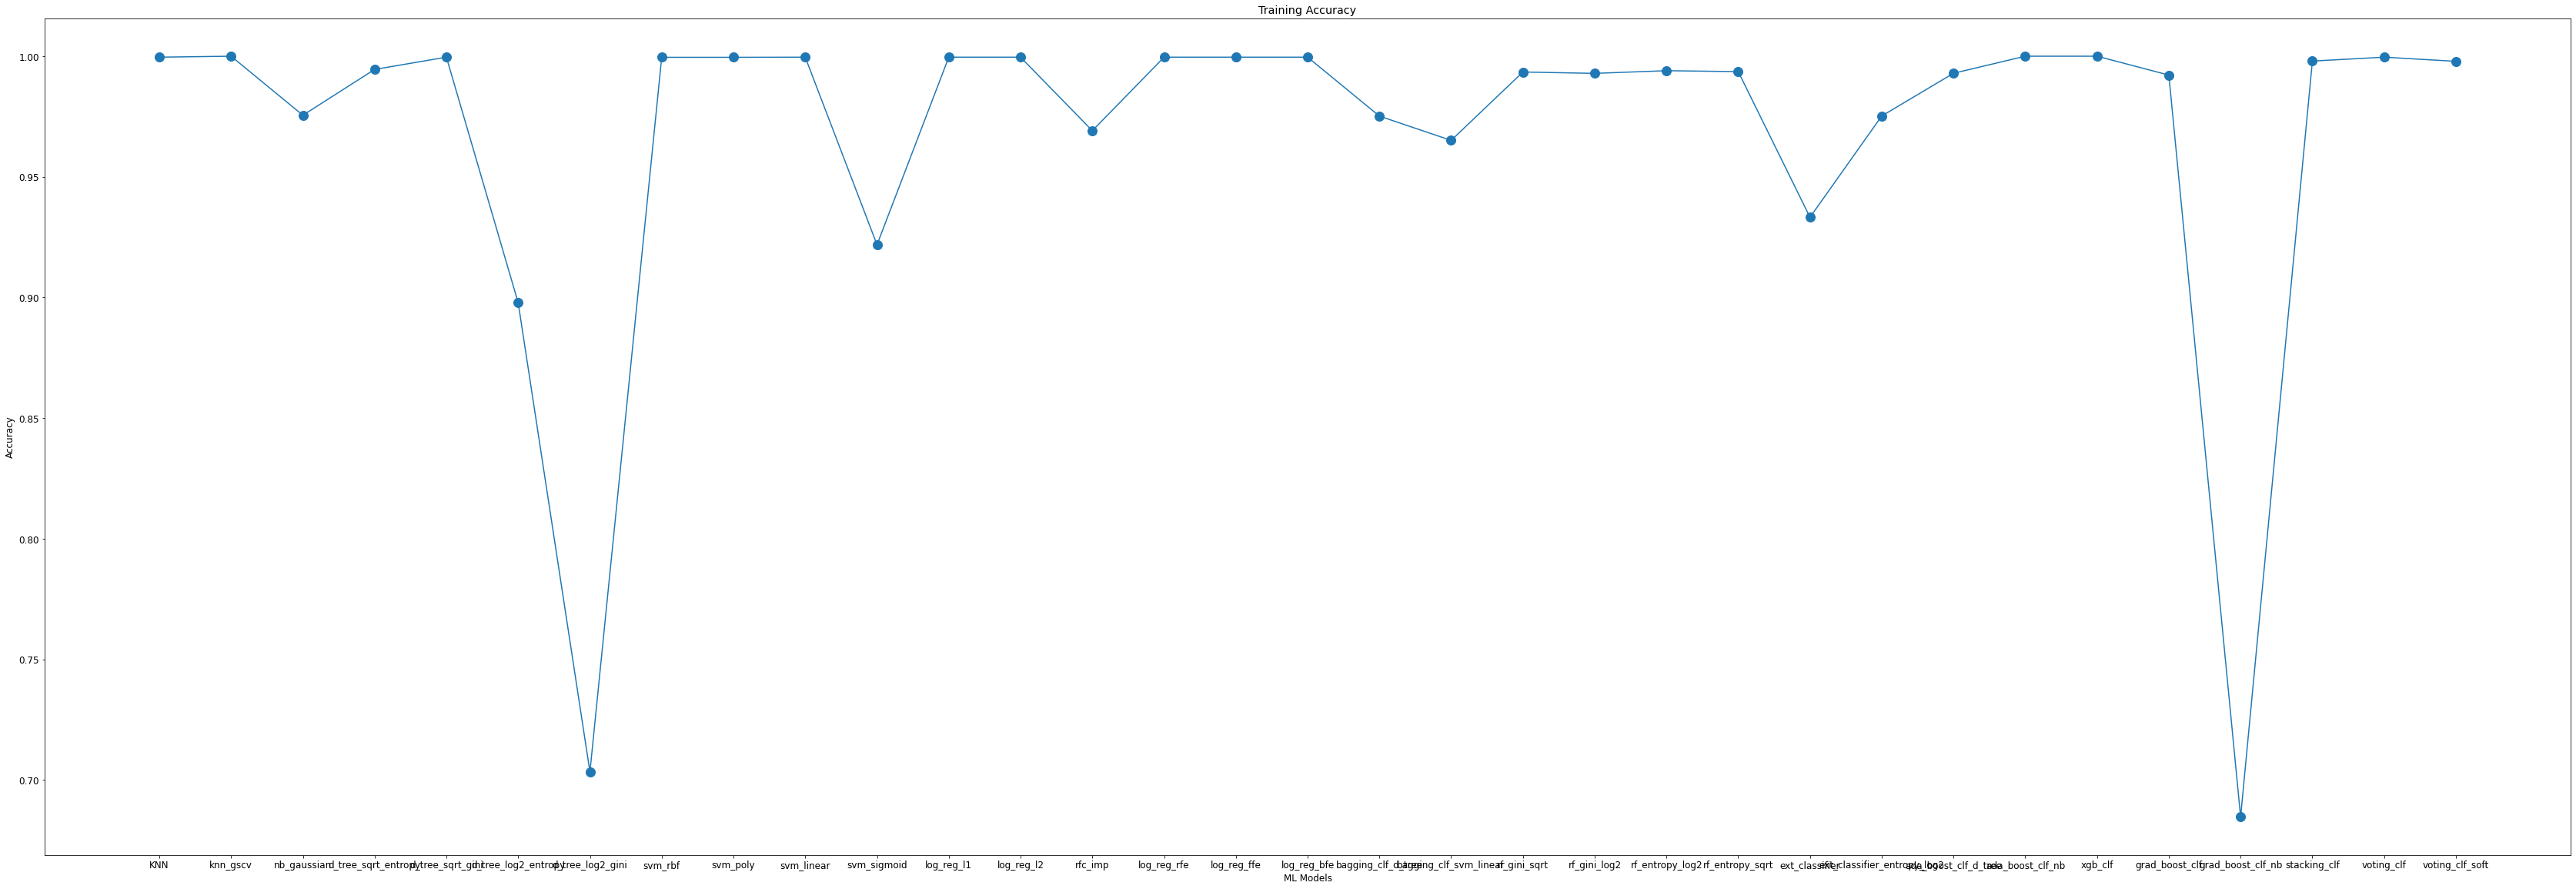

In [225]:
fig = plt.figure(figsize=(200,20))

plt.subplot(131)

plt.title('Training Accuracy')
plt.xlabel('ML Models')
plt.ylabel('Accuracy')

plt.subplot(131)
plt.plot(dict_training_accuracy.keys(), dict_training_accuracy.values(),  marker='o',  markersize=12)

fig.savefig('train_accuracy_line_graph.jpg',bbox_inches='tight')

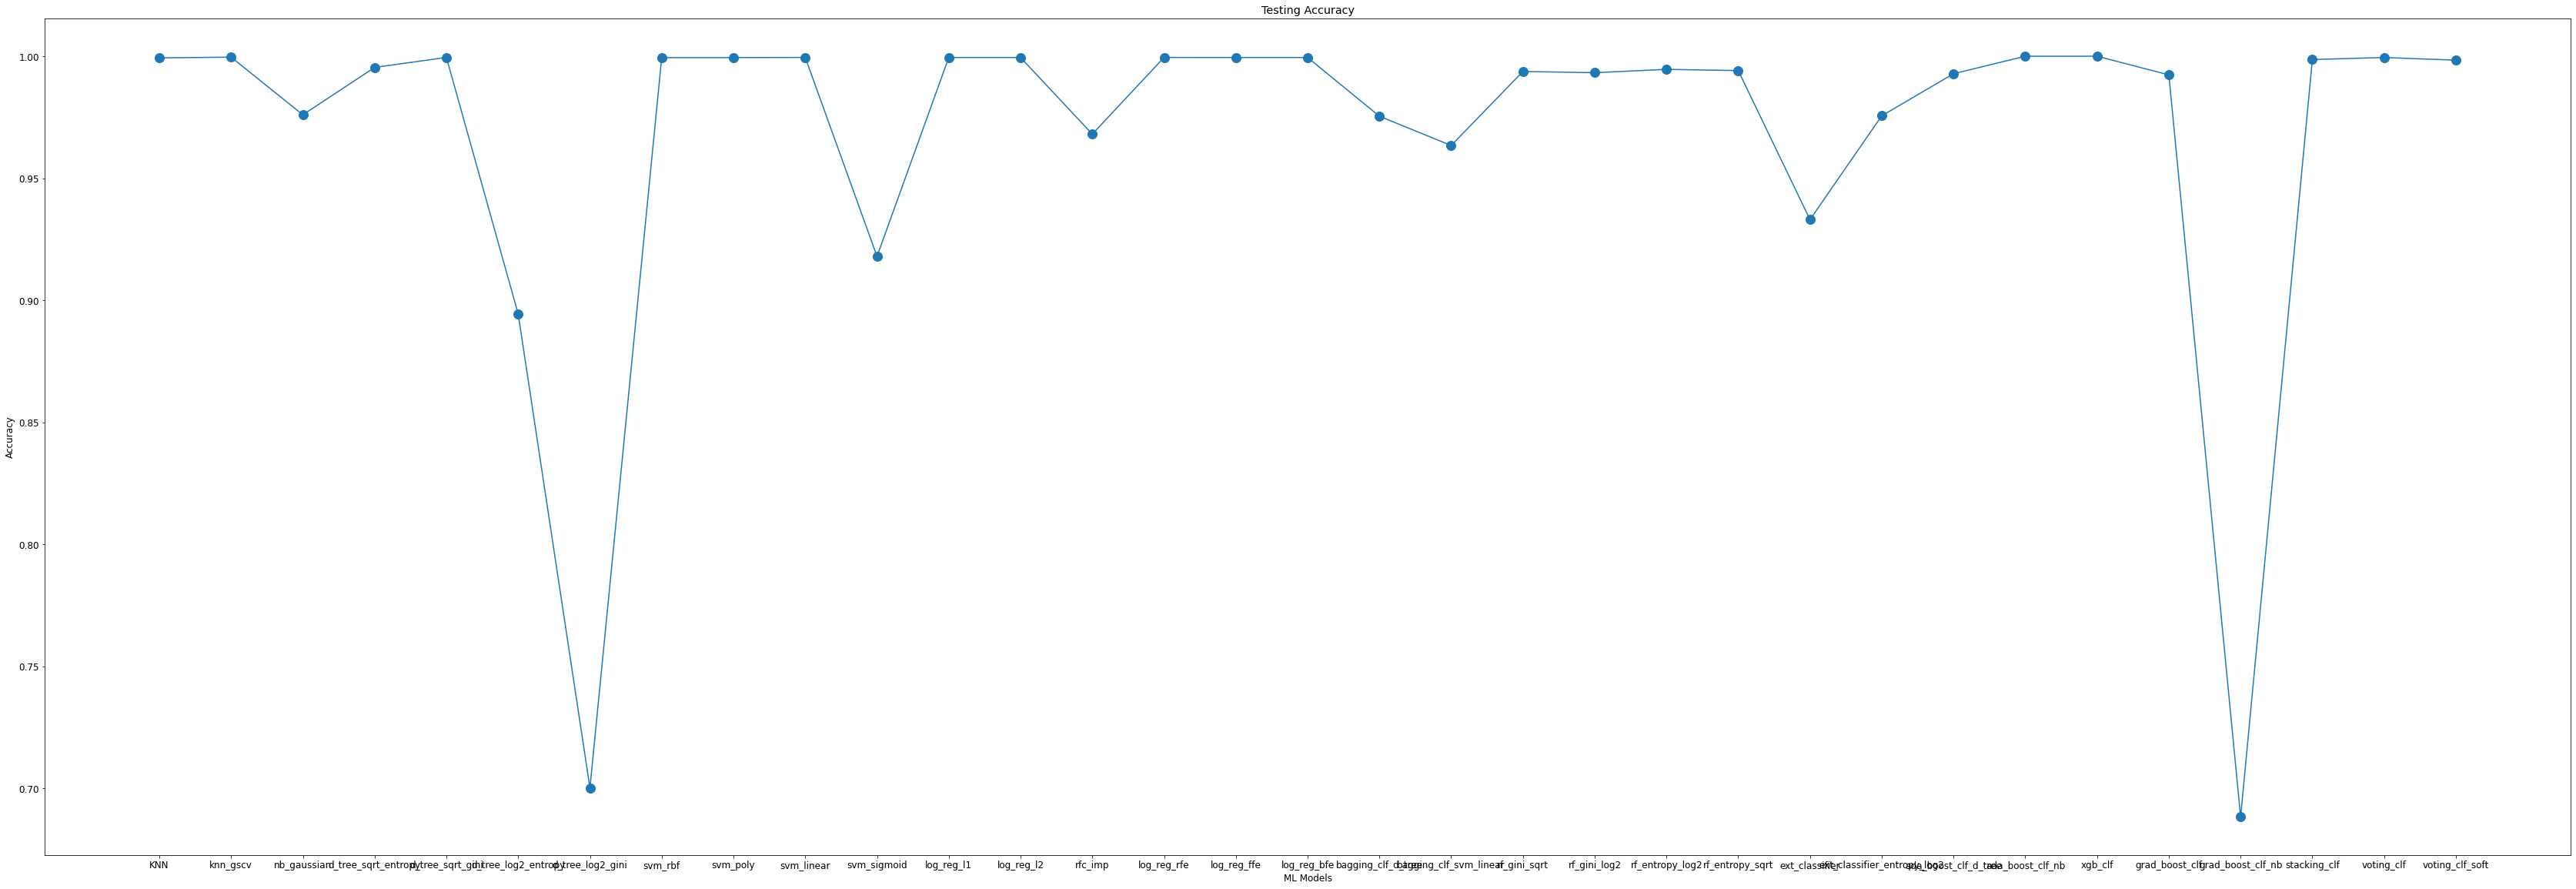

In [226]:
fig = plt.figure(figsize=(200,20))

plt.subplot(131)

plt.title('Testing Accuracy')
plt.xlabel('ML Models')
plt.ylabel('Accuracy')

plt.plot(dict_testing_accuracy.keys(), dict_testing_accuracy.values(),  marker='o',  markersize=12)

fig.savefig('test_accuracy_line_graph.jpg',bbox_inches='tight')

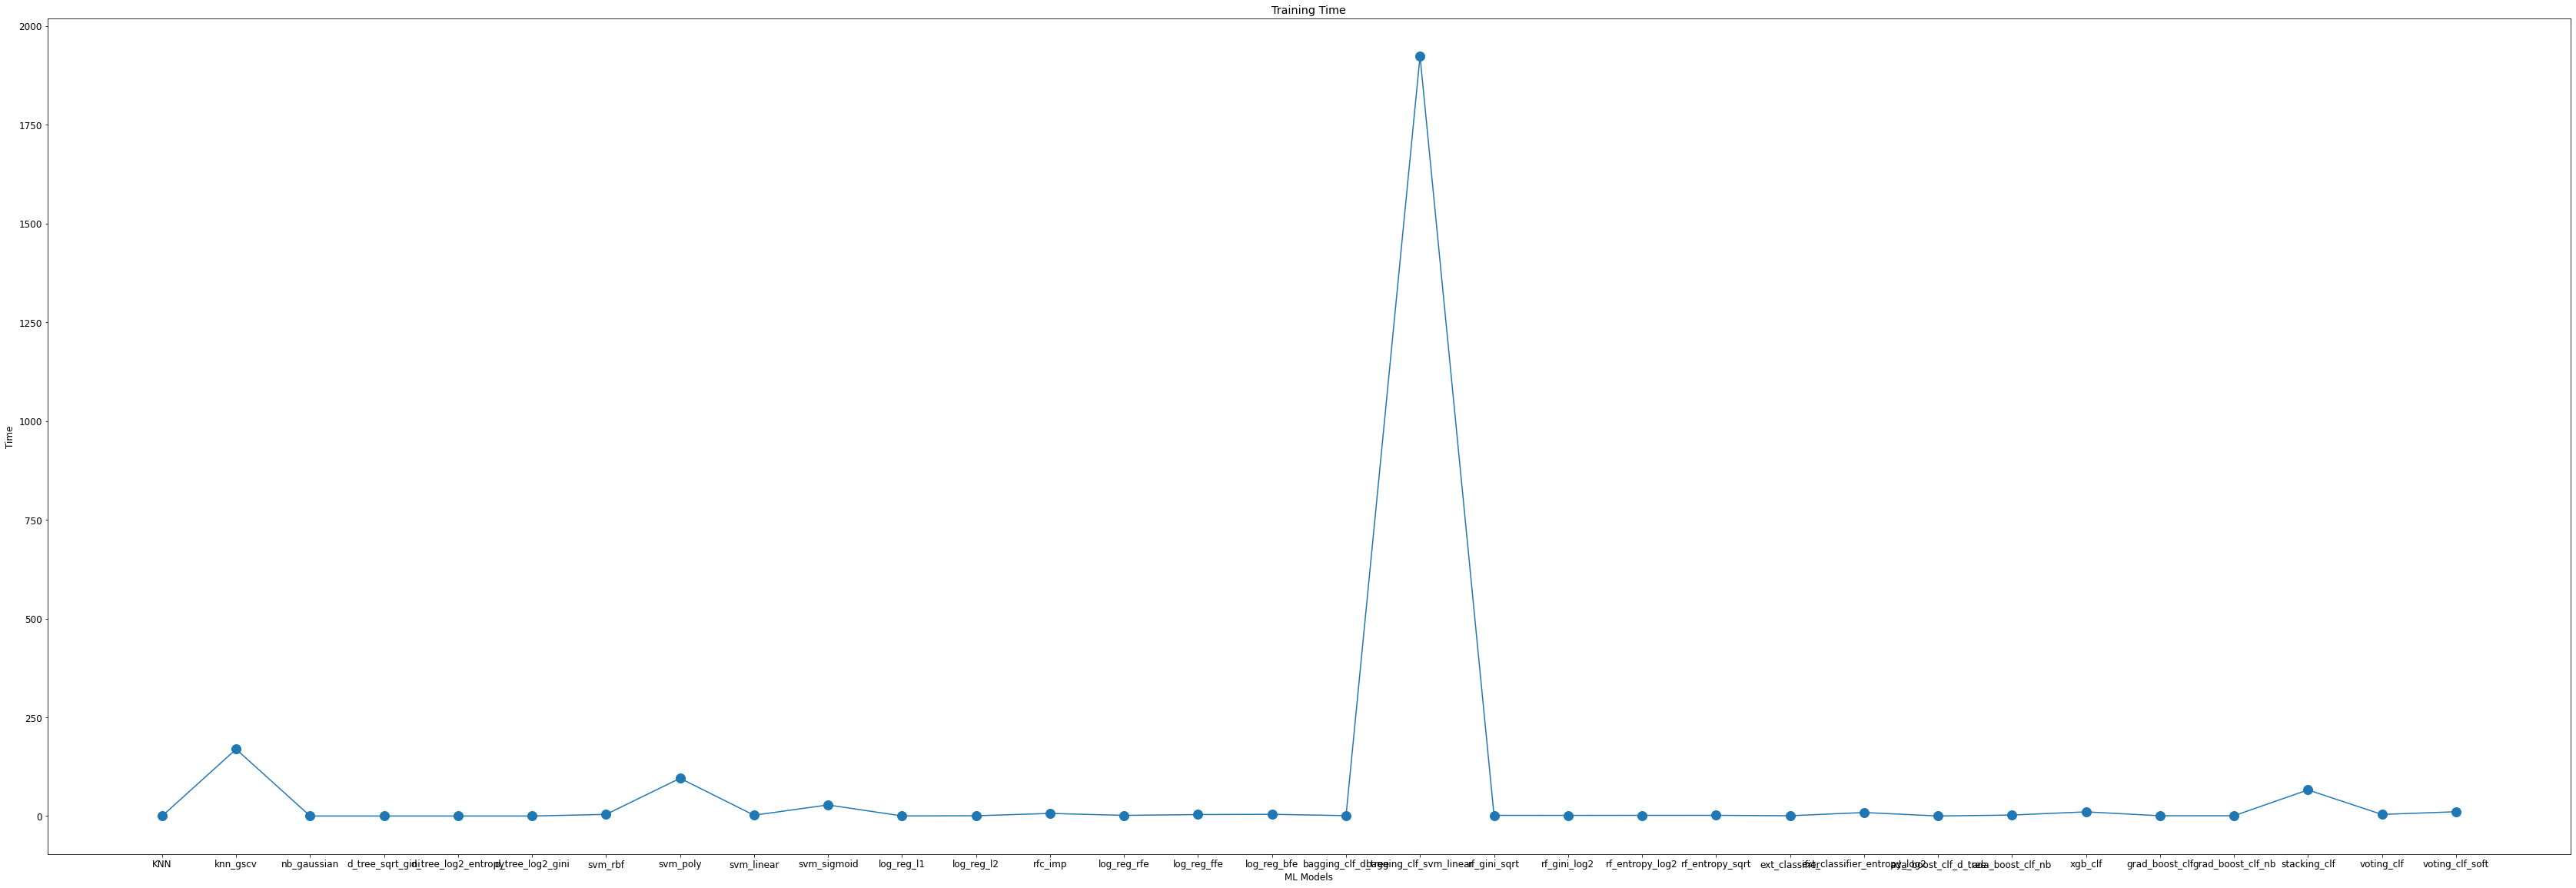

In [227]:
fig = plt.figure(figsize=(200,20))

plt.subplot(131)

plt.title('Training Time')
plt.xlabel('ML Models')
plt.ylabel('Time')

plt.plot(dict_training_time.keys(), dict_training_time.values(),  marker='o',  markersize=12)

fig.savefig('train_time_line_graph.jpg',bbox_inches='tight')

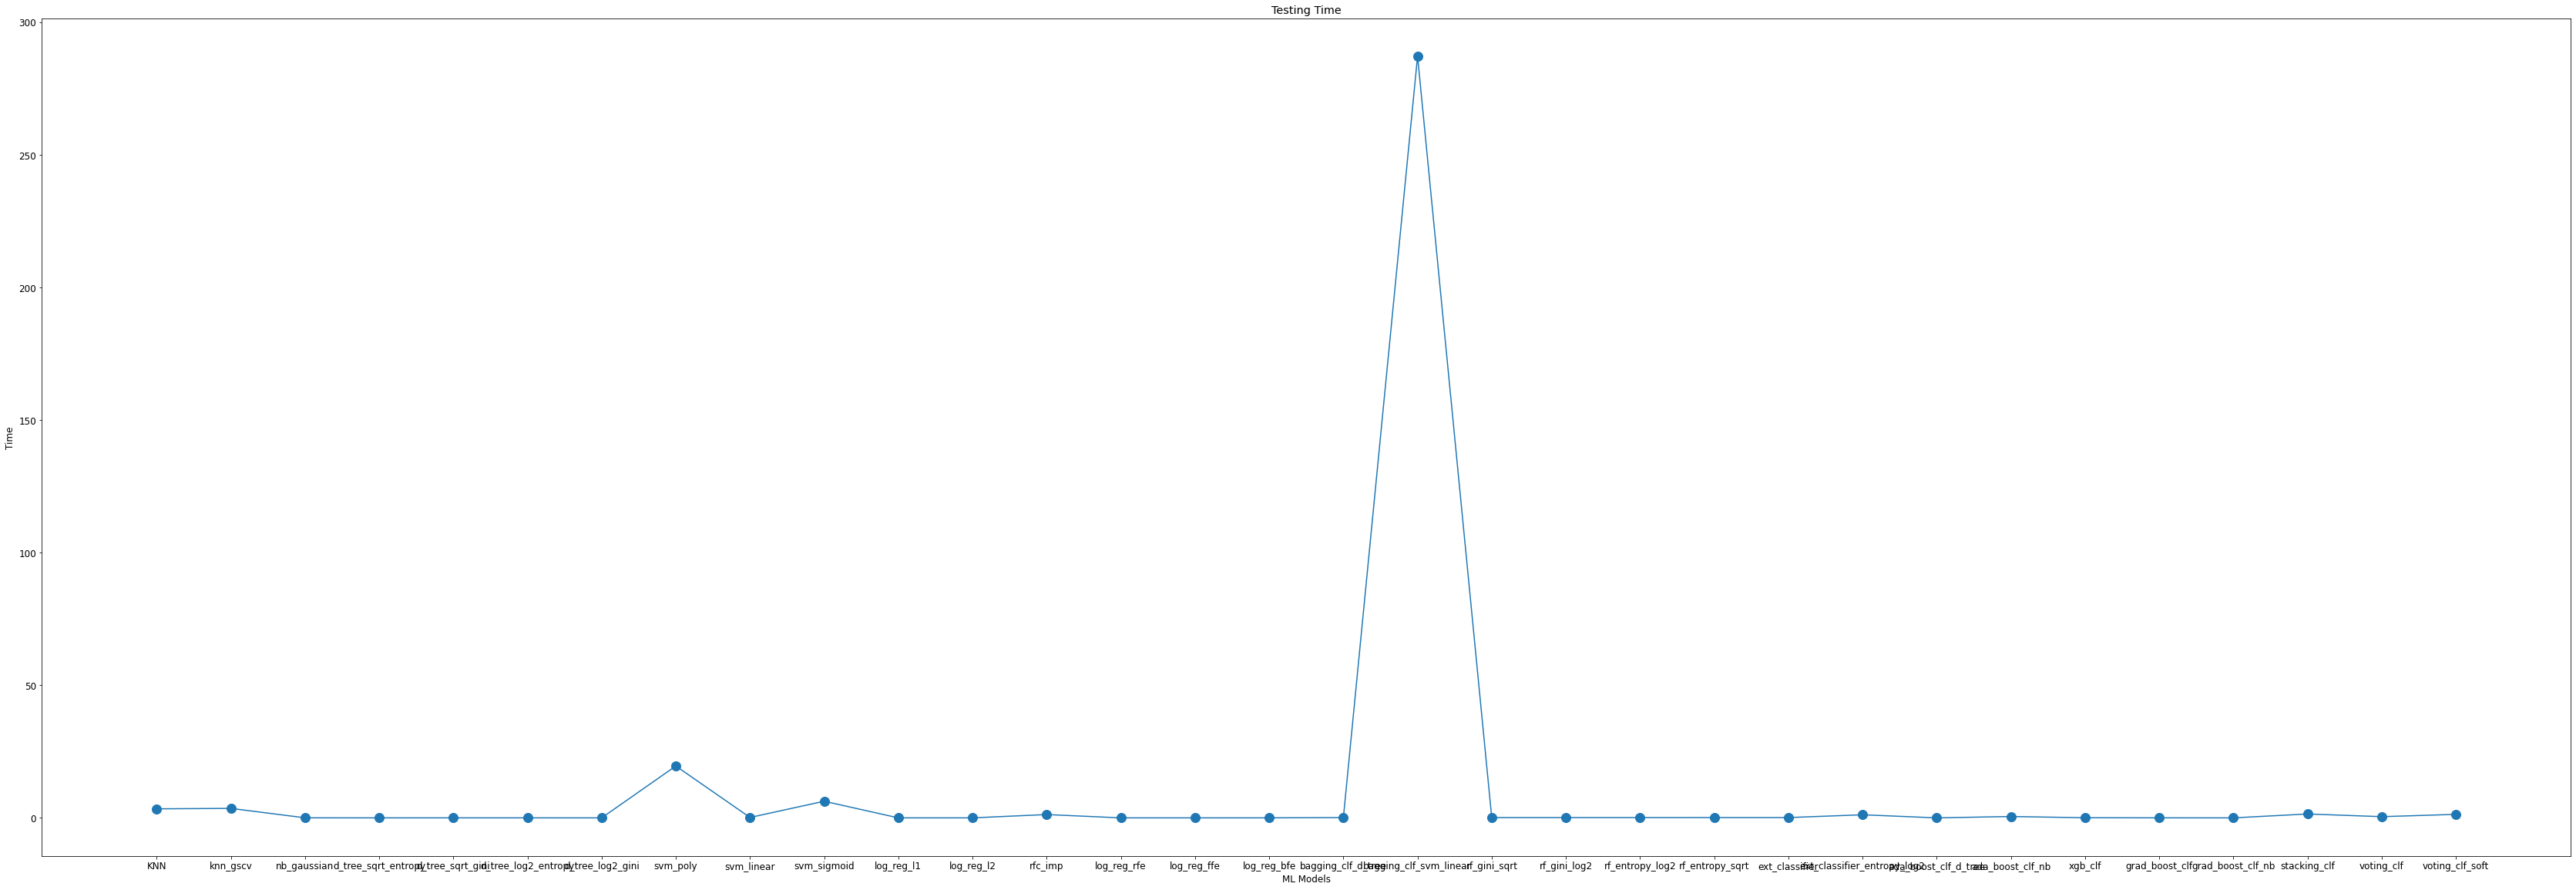

In [228]:
fig = plt.figure(figsize=(200,20))

plt.subplot(131)

plt.title('Testing Time')
plt.xlabel('ML Models')
plt.ylabel('Time')


plt.plot(dict_testing_time.keys(), dict_testing_time.values(), marker='o',  markersize=12)

fig.savefig('test_time_line_graph.jpg',bbox_inches='tight')

In [229]:
# training
#knn_graph = {
   # "KNN": dict_training_accuracy["KNN"],
   # "knn_gscv": dict_training_accuracy["KNN"],
        #  }

d_trees = {
    "d_tree_log2_entropy": dict_training_accuracy["d_tree_log2_entropy"], 
    "d_tree_log2_gini": dict_training_accuracy["d_tree_log2_gini"], 
    "d_tree_sqrt_entropy": dict_training_accuracy["d_tree_sqrt_entropy"], 
#     "d_tree_sqrt_gini": dict_training_accuracy["d_tree_sqrt_gini"]
          }


svms = {
    "svm_linear": dict_training_accuracy["svm_linear"], 
    "svm_poly": dict_training_accuracy["svm_poly"], 
    "svm_rbf" : dict_training_accuracy["svm_rbf"], 
#     "svm_sigmoid" : dict_training_accuracy["svm_sigmoid"]
       }


rfs = {
    "rf_entropy_log2": dict_training_accuracy["rf_entropy_log2"], 
    "rf_entropy_sqrt":dict_training_accuracy["rf_entropy_sqrt"], 
    "rf_gini_log2": dict_training_accuracy["rf_gini_log2"], 
#     "rf_gini_sqrt": dict_training_accuracy["rf_gini_sqrt"], 
#     "rfc_imp": dict_training_accuracy["rfc_imp"] 
      }


log_regs = {
#     "log_reg": dict_training_accuracy["log_reg"],
    "log_reg_l1": dict_training_accuracy["log_reg_l1"],
    "log_reg_l2": dict_training_accuracy["log_reg_l2"],
    "log_reg_rfe": dict_training_accuracy["log_reg_rfe"],
#     "log_reg_ffe": dict_training_accuracy["log_reg_ffe"],
#     "log_reg_bfe": dict_training_accuracy["log_reg_bfe"],
       }


bagging = {
    "bagging_clf_d_tree": dict_training_accuracy["bagging_clf_d_tree"],
    "bagging_clf_svm_linear": dict_training_accuracy["bagging_clf_svm_linear"],
#     "rf_entropy_log2": dict_training_accuracy["rf_entropy_log2"], 
#     "rf_entropy_sqrt":dict_training_accuracy["rf_entropy_sqrt"], 
#     "rf_gini_log2": dict_training_accuracy["rf_gini_log2"], 
#     "rf_gini_sqrt": dict_training_accuracy["rf_gini_sqrt"], 
    "rfc_imp": dict_training_accuracy["rfc_imp"]
    }

ext_trees = {
    "ext_classifier": dict_training_accuracy["ext_classifier"],
    "ext_classifier_entropy_log2": dict_training_accuracy["ext_classifier_entropy_log2"],
    "rf_gini_sqrt": dict_training_accuracy["rf_gini_sqrt"], 
}

boosting = {
    "ada_boost_clf_d_tree" : dict_training_accuracy["ada_boost_clf_d_tree"] ,
    #"ada_boost_clf_nb" : dict_training_accuracy["ada_boost_clf_nb"] ,
    "grad_boost_clf": dict_training_accuracy["grad_boost_clf"],
    "xgb_clf": dict_training_accuracy["xgb_clf"],
#     "grad_boost_clf_nb": dict_training_accuracy["grad_boost_clf_nb"],
}

#xgbgraph = {
    #"xgb_clf": dict_training_accuracy["xgb_clf"],
       #   }

ensembles = {
    "stacking_clf": dict_training_accuracy["stacking_clf"],
    "voting_clf": dict_training_accuracy["voting_clf"],
    "voting_clf_soft": dict_training_accuracy["voting_clf_soft"],  
}

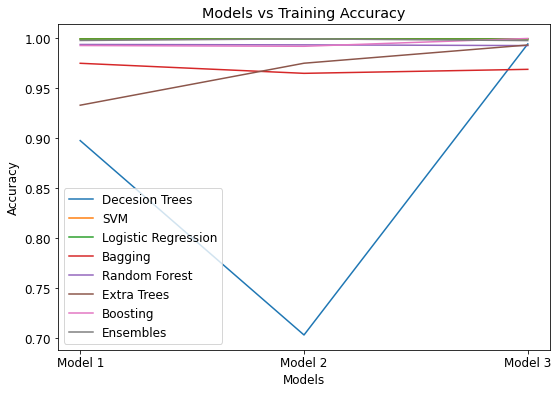

In [230]:
fig = plt.figure(figsize=(30,6))

plt.subplot(131)
plt.title("Models vs Training Accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy")

#plt.plot(["Model 1", "Model 2", "Model 3" ], knn_graph.values(), label="KNN")
plt.plot(["Model 1", "Model 2", "Model 3" ], d_trees.values(), label="Decesion Trees")
plt.plot(["Model 1", "Model 2", "Model 3" ], svms.values(), label="SVM")
plt.plot(["Model 1", "Model 2", "Model 3" ], log_regs.values(), label="Logistic Regression")
plt.plot(["Model 1", "Model 2", "Model 3" ], bagging.values(), label="Bagging")
plt.plot(["Model 1", "Model 2", "Model 3" ], rfs.values(), label="Random Forest")
plt.plot(["Model 1", "Model 2", "Model 3" ], ext_trees.values(), label="Extra Trees")
plt.plot(["Model 1", "Model 2", "Model 3" ], boosting.values(), label="Boosting")
#plt.plot(["Model 1", "Model 2", "Model 3" ], xgbgraph.values(), label="XGBAlgo")
plt.plot(["Model 1", "Model 2", "Model 3" ], ensembles.values(), label="Ensembles")

plt.legend()
plt.show()

fig.savefig('train_multiple_line_graph.jpg',bbox_inches='tight')

In [231]:
# training

#knn_graph = {
   # "knn": dict_testing_accuracy["knn"], 
        #  }

d_trees = {
    "d_tree_log2_entropy": dict_testing_accuracy["d_tree_log2_entropy"], 
    "d_tree_log2_gini": dict_testing_accuracy["d_tree_log2_gini"], 
    "d_tree_sqrt_entropy": dict_testing_accuracy["d_tree_sqrt_entropy"], 
#     "d_tree_sqrt_gini": dict_testing_accuracy["d_tree_sqrt_gini"]
          }


svms = {
    "svm_linear": dict_testing_accuracy["svm_linear"], 
    "svm_poly": dict_testing_accuracy["svm_poly"], 
    "svm_rbf" : dict_testing_accuracy["svm_rbf"], 
#     "svm_sigmoid" : dict_testing_accuracy["svm_sigmoid"]
       }


rfs = {
    "rf_entropy_log2": dict_testing_accuracy["rf_entropy_log2"], 
    "rf_entropy_sqrt":dict_testing_accuracy["rf_entropy_sqrt"], 
    "rf_gini_log2": dict_testing_accuracy["rf_gini_log2"], 
#     "rf_gini_sqrt": dict_testing_accuracy["rf_gini_sqrt"], 
#     "rfc_imp": dict_testing_accuracy["rfc_imp"] 
      }


log_regs = {
#     "log_reg": dict_testing_accuracy["log_reg"],
    "log_reg_l1": dict_testing_accuracy["log_reg_l1"],
    "log_reg_l2": dict_testing_accuracy["log_reg_l2"],
    "log_reg_rfe": dict_testing_accuracy["log_reg_rfe"],
#     "log_reg_ffe": dict_testing_accuracy["log_reg_ffe"],
#     "log_reg_bfe": dict_testing_accuracy["log_reg_bfe"],
       }


bagging = {
    "bagging_clf_d_tree": dict_testing_accuracy["bagging_clf_d_tree"],
    "bagging_clf_svm_linear": dict_testing_accuracy["bagging_clf_svm_linear"],
#     "rf_entropy_log2": dict_testing_accuracy["rf_entropy_log2"], 
#     "rf_entropy_sqrt":dict_testing_accuracy["rf_entropy_sqrt"], 
#     "rf_gini_log2": dict_testing_accuracy["rf_gini_log2"], 
#     "rf_gini_sqrt": dict_testing_accuracy["rf_gini_sqrt"], 
    "rfc_imp": dict_testing_accuracy["rfc_imp"]
    }

ext_trees = {
    "ext_classifier": dict_testing_accuracy["ext_classifier"],
    "ext_classifier_entropy_log2": dict_testing_accuracy["ext_classifier_entropy_log2"],
    "rf_gini_sqrt": dict_testing_accuracy["rf_gini_sqrt"], 
}

boosting = {
    "ada_boost_clf_d_tree" : dict_testing_accuracy["ada_boost_clf_d_tree"] ,
    #"ada_boost_clf_nb" : dict_testing_accuracy["ada_boost_clf_nb"] ,
    "grad_boost_clf": dict_testing_accuracy["grad_boost_clf"],
     "xgb_clf": dict_testing_accuracy["xgb_clf"],
#     "grad_boost_clf_nb": dict_testing_accuracy["grad_boost_clf_nb"],
}

#xgb_graph = {
  #  "xgb_clf": dict_testing_accuracy["xgb_clf"], 
     #     }



ensembles = {
    "stacking_clf": dict_testing_accuracy["stacking_clf"],
    "voting_clf": dict_testing_accuracy["voting_clf"],
    "voting_clf_soft": dict_testing_accuracy["voting_clf_soft"],  
}


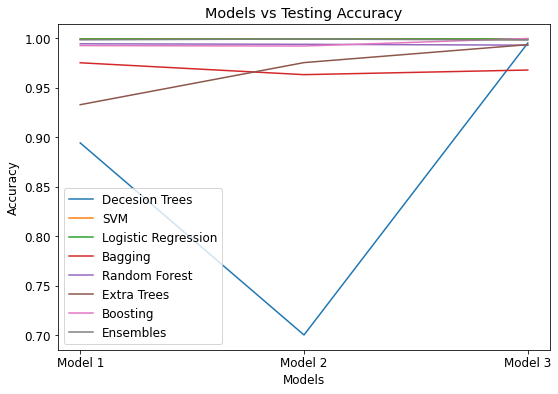

In [232]:
fig = plt.figure(figsize=(30,6))

plt.subplot(131)
plt.title("Models vs Testing Accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy")

#plt.plot(["Model 1", "Model 2", "Model 3" ], knn_graph.values(), label="KNeighborsClassifier", )
plt.plot(["Model 1", "Model 2", "Model 3" ], d_trees.values(), label="Decesion Trees", )
plt.plot(["Model 1", "Model 2", "Model 3" ], svms.values(), label="SVM", )
plt.plot(["Model 1", "Model 2", "Model 3" ], log_regs.values(), label="Logistic Regression")
plt.plot(["Model 1", "Model 2", "Model 3" ], bagging.values(), label="Bagging")
plt.plot(["Model 1", "Model 2", "Model 3" ], rfs.values(), label="Random Forest")
plt.plot(["Model 1", "Model 2", "Model 3" ], ext_trees.values(), label="Extra Trees")
plt.plot(["Model 1", "Model 2", "Model 3" ], boosting.values(), label="Boosting")
#plt.plot(["Model 1", "Model 2", "Model 3" ], xgb_graph.values(), label="XGBAlgo")
plt.plot(["Model 1", "Model 2", "Model 3" ], ensembles.values(), label="Ensembles")

plt.legend()
plt.show()

fig.savefig('test_multiple_line_graph.jpg',bbox_inches='tight')

In [233]:
sorted(dict_training_accuracy.items(), key=lambda x: x[1], reverse=True)

[('knn_gscv', 1.0),
 ('ada_boost_clf_nb', 1.0),
 ('xgb_clf', 1.0),
 ('KNN', 0.999599531760212),
 ('d_tree_sqrt_gini', 0.999599531760212),
 ('svm_linear', 0.999599531760212),
 ('log_reg_l1', 0.999599531760212),
 ('log_reg_l2', 0.999599531760212),
 ('log_reg_rfe', 0.999599531760212),
 ('log_reg_ffe', 0.999599531760212),
 ('log_reg_bfe', 0.999599531760212),
 ('voting_clf', 0.999599531760212),
 ('svm_rbf', 0.999537921261783),
 ('svm_poly', 0.999537921261783),
 ('stacking_clf', 0.9979822561764524),
 ('voting_clf_soft', 0.9978744378042018),
 ('d_tree_sqrt_entropy', 0.994516665639825),
 ('rf_entropy_log2', 0.9939929764031791),
 ('rf_entropy_sqrt', 0.9936079107879983),
 ('rf_gini_sqrt', 0.993453884541926),
 ('ada_boost_clf_d_tree', 0.99293019530528),
 ('rf_gini_log2', 0.9928839874314583),
 ('grad_boost_clf', 0.9921754666995256),
 ('nb_gaussian', 0.9755252294991067),
 ('ext_classifier_entropy_log2', 0.9752325796315692),
 ('bagging_clf_d_tree', 0.9751709691331403),
 ('rfc_imp', 0.969117737662497

In [234]:
sorted(dict_testing_accuracy.items(), key=lambda x: x[1], reverse=True)

[('ada_boost_clf_nb', 1.0),
 ('xgb_clf', 1.0),
 ('knn_gscv', 0.9996046720575023),
 ('d_tree_sqrt_gini', 0.9994968553459119),
 ('svm_linear', 0.9994968553459119),
 ('log_reg_rfe', 0.9994968553459119),
 ('log_reg_l1', 0.9994609164420485),
 ('log_reg_l2', 0.9994609164420485),
 ('log_reg_ffe', 0.9994609164420485),
 ('log_reg_bfe', 0.9994609164420485),
 ('voting_clf', 0.9994609164420485),
 ('svm_rbf', 0.999424977538185),
 ('svm_poly', 0.999424977538185),
 ('KNN', 0.9993171608265948),
 ('stacking_clf', 0.9986343216531895),
 ('voting_clf_soft', 0.9983827493261456),
 ('d_tree_sqrt_entropy', 0.9953998203054807),
 ('rf_entropy_log2', 0.9946091644204852),
 ('rf_entropy_sqrt', 0.9941060197663971),
 ('rf_gini_sqrt', 0.9937466307277628),
 ('rf_gini_log2', 0.9932434860736747),
 ('ada_boost_clf_d_tree', 0.9928122192273136),
 ('grad_boost_clf', 0.9923450134770889),
 ('nb_gaussian', 0.9759928122192273),
 ('ext_classifier_entropy_log2', 0.9755974842767295),
 ('bagging_clf_d_tree', 0.9754177897574124),
 (

In [235]:
best_train_accuracy = {}

best_train_accuracy["knn"] = dict_training_accuracy["KNN"]
best_train_accuracy["knn2"] = dict_training_accuracy["knn_gscv"]
best_train_accuracy["svm_linear"] = dict_training_accuracy["svm_linear"]
best_train_accuracy["d_tree_sqrt_entropy"] = dict_training_accuracy["d_tree_sqrt_entropy"]
best_train_accuracy["log_reg_rfe"] = dict_training_accuracy["log_reg_rfe"]
best_train_accuracy["rf_entropy_sqrt"] = dict_training_accuracy["rf_entropy_sqrt"]
best_train_accuracy["nb_gaussian"] = dict_training_accuracy["nb_gaussian"]
best_train_accuracy["grad_boost_clf"] = dict_training_accuracy["grad_boost_clf"]
best_train_accuracy["xgb_clf"] = dict_training_accuracy["xgb_clf"]
best_train_accuracy["log_reg_l1"] = dict_training_accuracy["log_reg_l1"]
best_train_accuracy["voting_clf"] = dict_training_accuracy["voting_clf"]



# best_train_accuracy["ext_classifier_entropy_log2"] = dict_training_accuracy["ext_classifier_entropy_log2"]
# best_train_accuracy["grad_boost_clf"] = dict_training_accuracy["grad_boost_clf"]


# ## shuffling the pairs
# list1 =  list(best_train_accuracy.items())
# np.random.shuffle(list1)
# best_train_accuracy = dict(list1)

best_train_accuracy

{'knn': 0.999599531760212,
 'knn2': 1.0,
 'svm_linear': 0.999599531760212,
 'd_tree_sqrt_entropy': 0.994516665639825,
 'log_reg_rfe': 0.999599531760212,
 'rf_entropy_sqrt': 0.9936079107879983,
 'nb_gaussian': 0.9755252294991067,
 'grad_boost_clf': 0.9921754666995256,
 'xgb_clf': 1.0,
 'log_reg_l1': 0.999599531760212,
 'voting_clf': 0.999599531760212}

In [236]:
best_test_accuracy = {}

best_test_accuracy["knn"] = dict_testing_accuracy["KNN"]
best_test_accuracy["knn2"] = dict_testing_accuracy["knn_gscv"]
best_test_accuracy["svm_linear"] = dict_testing_accuracy["svm_linear"]
best_test_accuracy["d_tree_sqrt_entropy"] = dict_testing_accuracy["d_tree_sqrt_entropy"]
best_test_accuracy["log_reg_rfe"] = dict_testing_accuracy["log_reg_rfe"]
best_test_accuracy["rf_entropy_sqrt"] = dict_testing_accuracy["rf_entropy_sqrt"]
best_test_accuracy["nb_gaussian"] = dict_testing_accuracy["nb_gaussian"]
best_test_accuracy["grad_boost_clf"] = dict_testing_accuracy["grad_boost_clf"]
best_test_accuracy["xgb_clf"] = dict_testing_accuracy["xgb_clf"]
best_test_accuracy["log_reg_l1"] = dict_testing_accuracy["log_reg_l1"]
best_test_accuracy["voting_clf"] = dict_testing_accuracy["voting_clf"]

# best_test_accuracy["ext_classifier_entropy_log2"] = dict_testing_accuracy["ext_classifier_entropy_log2"]
# best_test_accuracy["grad_boost_clf"] = dict_testing_accuracy["grad_boost_clf"]

## shuffling the pairs
# list1 =  list(best_test_accuracy.items())
# np.random.shuffle(list1)
# best_test_accuracy = dict(list1)

best_test_accuracy

{'knn': 0.9993171608265948,
 'knn2': 0.9996046720575023,
 'svm_linear': 0.9994968553459119,
 'd_tree_sqrt_entropy': 0.9953998203054807,
 'log_reg_rfe': 0.9994968553459119,
 'rf_entropy_sqrt': 0.9941060197663971,
 'nb_gaussian': 0.9759928122192273,
 'grad_boost_clf': 0.9923450134770889,
 'xgb_clf': 1.0,
 'log_reg_l1': 0.9994609164420485,
 'voting_clf': 0.9994609164420485}

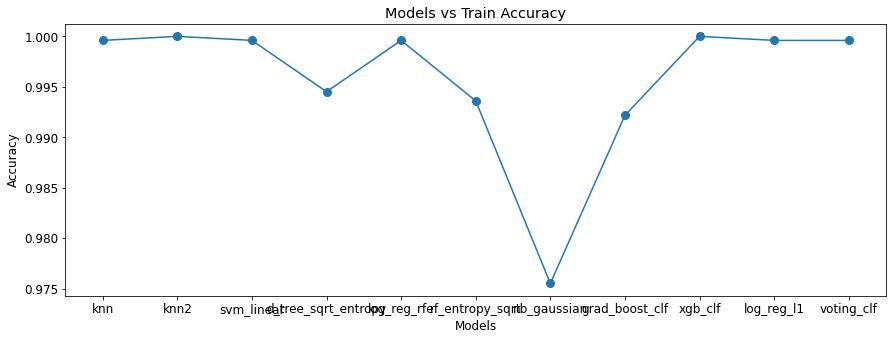

In [237]:

fig = plt.figure(figsize=(50,5))

plt.subplot(131)
plt.title("Models vs Train Accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy")


plt.plot(best_train_accuracy.keys(), best_train_accuracy.values(), marker='o',  markersize=8)
plt.show()

fig.savefig('best_train_accuracy_line_graph.jpg',bbox_inches='tight')


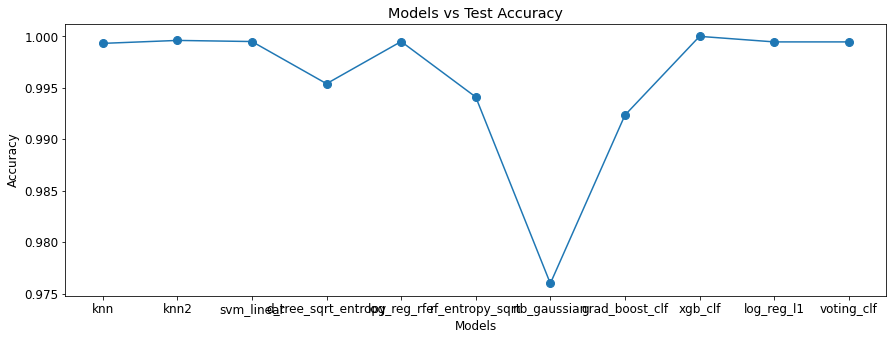

In [238]:

fig = plt.figure(figsize=(50,5))

plt.subplot(131)
plt.title("Models vs Test Accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy")


plt.plot(best_test_accuracy.keys(), best_test_accuracy.values(), marker='o',  markersize=8)
plt.show()

fig.savefig('best_test_accuracy_line_graph.jpg',bbox_inches='tight')


In [239]:
max_train_accuracy = max(dict_training_accuracy.keys(), key=(lambda k: dict_training_accuracy[k]))
max_test_accuracy = max(dict_testing_accuracy.keys(), key=(lambda k: dict_testing_accuracy[k]))

min_train_accuracy = min(dict_training_accuracy.keys(), key=(lambda k: dict_training_accuracy[k]))
min_test_accuracy = min(dict_testing_accuracy.keys(), key=(lambda k: dict_testing_accuracy[k]))

# 

max_train_time = max(dict_training_time.keys(), key=(lambda k: dict_training_time[k]))
max_test_time = max(dict_testing_time.keys(), key=(lambda k: dict_testing_time[k]))

min_train_time = min(dict_training_time.keys(), key=(lambda k: dict_training_time[k]))
min_test_time = min(dict_testing_time.keys(), key=(lambda k: dict_testing_time[k]))


In [240]:
print('Algorithm: ', max_train_accuracy,'\nMax Training Accuracy:', dict_training_accuracy[max_train_accuracy])

Algorithm:  knn_gscv 
Max Training Accuracy: 1.0


In [241]:
print('Algorithm: ', max_test_accuracy,'\nMax Testing Accuracy:', dict_testing_accuracy[max_test_accuracy])

Algorithm:  ada_boost_clf_nb 
Max Testing Accuracy: 1.0


In [242]:
print('Algorithm: ', min_train_accuracy,'\nMin Training Accuracy:', dict_training_accuracy[min_train_accuracy])

Algorithm:  grad_boost_clf_nb 
Min Training Accuracy: 0.6846928716653318


In [243]:
print('Algorithm: ', min_test_accuracy,'\nMin Testing Accuracy:', dict_testing_accuracy[min_test_accuracy])

Algorithm:  grad_boost_clf_nb 
Min Testing Accuracy: 0.6883378256963163


In [244]:
print('Algorithm: ', max_train_time,'\nMax Training Time:', dict_training_time[max_train_time])

Algorithm:  bagging_clf_svm_linear 
Max Training Time: 1923.7795276641846


In [245]:
print('Algorithm: ', max_test_time,'\nMax Testing Time:', dict_testing_time[max_test_time])

Algorithm:  bagging_clf_svm_linear 
Max Testing Time: 287.1744918823242


In [246]:
print('Algorithm: ', min_train_time,'\nMin Training Time:', dict_training_time[min_train_time])

Algorithm:  KNN 
Min Training Time: 0.0064809322357177734


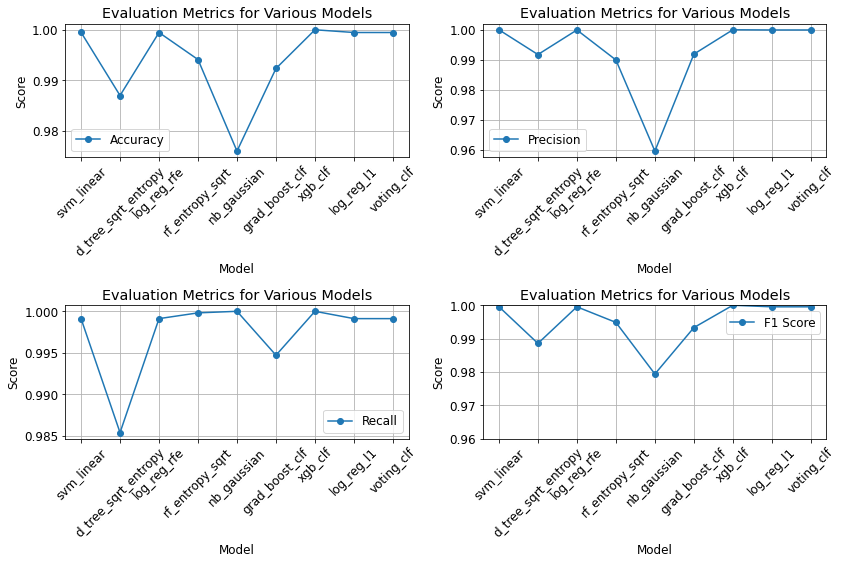

In [247]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initialize lists to store evaluation metrics for each model
model_names = ['svm_linear', 'd_tree_sqrt_entropy', 'log_reg_rfe','rf_entropy_sqrt','nb_gaussian', 'grad_boost_clf', 'xgb_clf','log_reg_l1','voting_clf']  # Replace with your model names
model_list = [svm_linear, d_tree_sqrt_entropy, log_reg_l1, rf_entropy_sqrt, nb_gaussian, grad_boost_clf, xgb_clf, log_reg_l1, voting_clf]  # Replace with your model instances
metrics_dict = {}

# Loop through each model to evaluate its performance
for model, model_name in zip(model_list, model_names):
    # Evaluate the model on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store evaluation metrics in the dictionary
    metrics_dict[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Plot the graphs
plt.figure(figsize=(12,8))

for idx, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1 Score']):
    plt.subplot(2,2, idx + 1)
   # plt.bar(metrics_dict.keys(), [metrics[metric] for metrics in metrics_dict.values()])
   # plt.title(metric)
   # plt.ylim(0, 1)

#plt.tight_layout()
#plt.show())

    plt.plot(model_names, [metrics_dict[model_name][metric] for model_name in model_names], marker='o', label=metric)
    plt.title('Evaluation Metrics for Various Models')
    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
plt.ylim(0.96, 1)
plt.tight_layout()
plt.show()
